# Laboratorio 1 Series de Tiempo

Sofia Garcia - 22210

Julio Garcia Salas - 22076

Joaquin Campos - 22155

In [2]:
import pandas as pd

file_path = "Estadisticas_historicas_comercializacion.xlsx"

importacion_df = pd.read_excel(file_path, sheet_name="IMPORTACION", header=6, nrows=289)
consumo_df = pd.read_excel(file_path, sheet_name="CONSUMO", header=6, nrows=301)

#consumo_df.head()
importacion_df.head()


C:\Users\jjcam\AppData\Local\Temp\ipykernel_31164\2873291014.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Fecha  Aceites lubricantes  Asfalto      Bunker  Ceras  \
0 2001-01-01                  0.0  27748.99  214581.84    0.0   
1 2001-02-01                  0.0   7503.57  294609.00    0.0   
2 2001-03-01                  0.0  26304.32  315263.80    0.0   
3 2001-04-01                  0.0   7885.89  205653.00    0.0   
4 2001-05-01                  0.0   8443.16  278371.30    0.0   

   Combustible turbo jet  Diesel bajo azufre  Diesel ultra bajo azufre  \
0                    0.0                 0.0                       0.0   
1                    0.0                 0.0                       0.0   
2                    0.0                 0.0                       0.0   
3                    0.0                 0.0                       0.0   
4                    0.0                 0.0                       0.0   

   Gas licuado de petróleo  Gasolina de aviación  ...  Naftas  Petcoke  \
0            194065.738095                 820.0  ...     0.0      0.0   
1            170703.380952                3054.0  ...     0.0      0.0   
2            161837.371429                 677.0  ...     0.0      0.0   
3            163048.642857                3399.0  ...     0.0      0.0   
4            171518.861905                 585.0  ...     0.0      0.0   

   Petróleo crudo  Solventes  Butano  Diesel alto azufre   MTBE  Orimulsión  \
0             0.0        0.0     0.0           566101.99   8402         0.0   
1             0.0        0.0     0.0           489525.80      0         0.0   
2             0.0        0.0     0.0           575559.68      0         0.0   
3             0.0        0.0     0.0           437745.42   8184         0.0   
4             0.0        0.0     0.0           552609.13  12680         0.0   

   Petróleo reconstituido  Total importación  
0                  715344       2.312639e+06  
1                  370166       1.769209e+06  
2                  360530       1.945770e+06  
3                  359527       1.623638e+06  
4                  723346       2.262727e+06  

[5 rows x 25 columns]

DF que deseamos trabajar

In [3]:
cols = ["Fecha", "Gasolina regular", "Gasolina superior", "Diesel alto azufre"]

importacion_df = importacion_df[cols].copy()
importacion_df["Fecha"] = pd.to_datetime(importacion_df["Fecha"])
importacion_df = importacion_df.sort_values("Fecha").reset_index(drop=True)

consumo_df = consumo_df[cols].copy()
consumo_df["Fecha"] = pd.to_datetime(consumo_df["Fecha"])
consumo_df = consumo_df.sort_values("Fecha").reset_index(drop=True)

importacion_df.to_csv("importaciones_combustibles.csv", index=False)
consumo_df.to_csv("consumos_combustibles.csv", index=False)




In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Estilo bonito para los gráficos
sns.set(style="whitegrid")

#tipos
print("importacion:\n",importacion_df.dtypes)
print("consumo:\n",consumo_df.dtypes)


importacion:
 Fecha                 datetime64[ns]
Gasolina regular             float64
Gasolina superior            float64
Diesel alto azufre           float64
dtype: object
consumo:
 Fecha                 datetime64[ns]
Gasolina regular             float64
Gasolina superior            float64
Diesel alto azufre           float64
dtype: object


## Análisis exploratorio

Como visto en clase tenemos que buscar las 3 cosas para definir el modelo a tratar: tendencias, estacionalidad y ruido

Primero definimos como la fecha visualmente la serie de tiempo digamos es de un mes

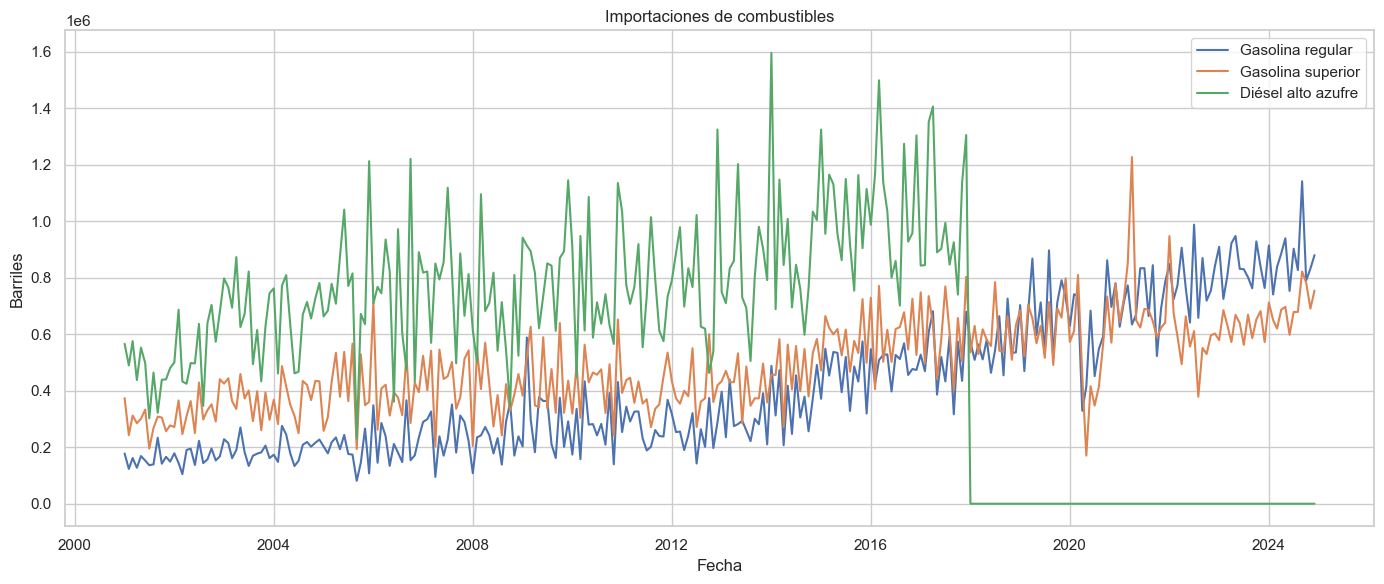

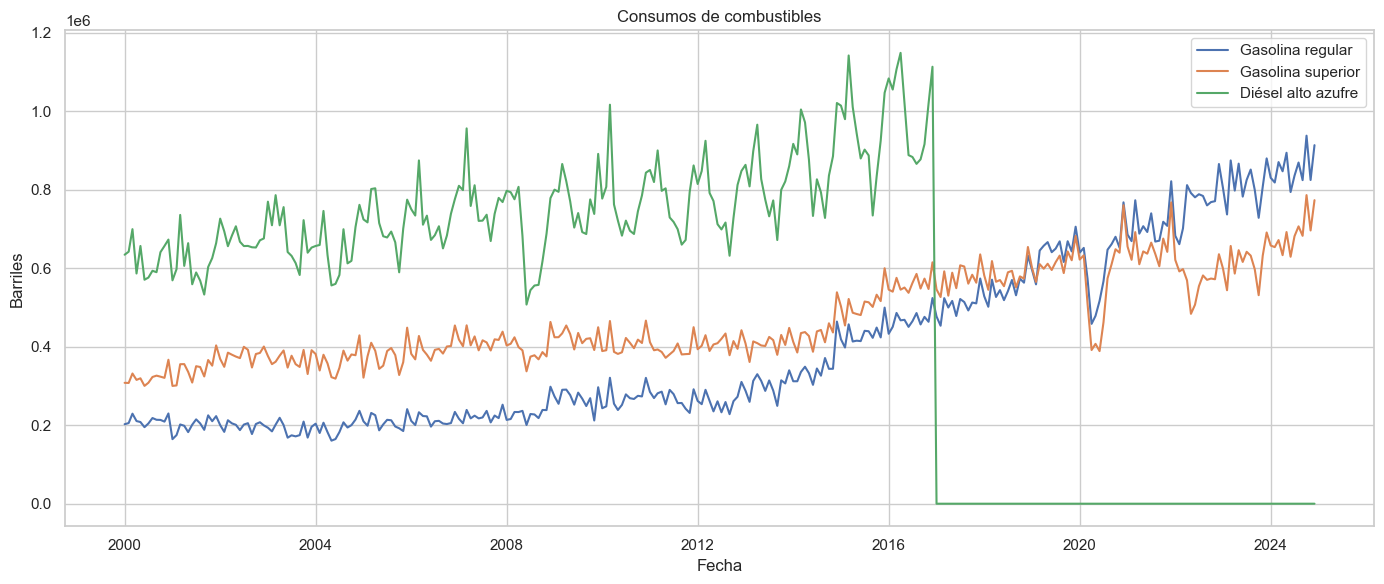

In [5]:
plt.figure(figsize=(14, 6))
plt.plot(importacion_df["Fecha"], importacion_df["Gasolina regular"], label="Gasolina regular")
plt.plot(importacion_df["Fecha"], importacion_df["Gasolina superior"], label="Gasolina superior")
plt.plot(importacion_df["Fecha"], importacion_df["Diesel alto azufre"], label="Diésel alto azufre")
plt.title("Importaciones de combustibles")
plt.xlabel("Fecha")
plt.ylabel("Barriles")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(consumo_df["Fecha"], consumo_df["Gasolina regular"], label="Gasolina regular")
plt.plot(consumo_df["Fecha"], consumo_df["Gasolina superior"], label="Gasolina superior")
plt.plot(consumo_df["Fecha"], consumo_df["Diesel alto azufre"], label="Diésel alto azufre")
plt.title("Consumos de combustibles")
plt.xlabel("Fecha")
plt.ylabel("Barriles")
plt.legend()
plt.tight_layout()
plt.show()



### Comentarios

Sin duda alguna  lo que mas llama la atencion es como al rededor del 2018... el diesel de alto azufre se fue a 0 directamente, y despues de un poco de investigación podemos concluir que este si tiene sentido y que fue por la Regulación nacional: entrada en vigor del reglamento COGUANOR, Impacto en salud pública y ambiente y basicamente que ahora casi solo se usa bajo en azufre 

### Importaciones

1. Tendencia general

Las tres series muestran una tendencia creciente a lo largo del tiempo, particularmente Gasolina regular y superior. El crecimiento es más claro después de 2015 para gasolina regular.

2. Caídas abruptas y anomalías

Se observa una caída abrupta en 2020, justo cuando inicia la pandemia. Este efecto es visible especialmente en mabas gasolinas.

3. Estacionalidad y picos

Hay picos irregulares año con año, más notorios en diésel alto azufre hasta su desaparición que pareciera como que si tiene patron entonces desde ahi podemos tal vez empezar a ubicar nuestras series. Gasolina superior también muestra picos de importación en varios años, algunos muy marcados entre 2006 y 2018. La estacionalidad no parece haber a simple vista entonces al evaluar otra serie de tiempo podriamos evaluar.


### Consumo

1. Tendencia general

Gasolina regular y superior muestran una clara tendencia creciente, especialmente gasolina regular.

Diésel alto azufre mantuvo tendencia minima tambien creciente hasta que baja a 0.

2. Picos y caídas por pandemia

Se observa una disminución marcada en todos los combustibles entre marzo y junio de 2020 por pandemia.

Gasolina regular cae notoriamente, pero se recupera rápidamente y continúa su crecimiento.

Gasolina superior cae y se estabiliza.


3. Estacionalidad

Diésel alto azufre muestra ligeros picos cíclicos, entonces podria ser por uso industrial o agrícola estacional.

Gasolina superior muestra picos más dispersos, con cierta repetición anual.


## Serie 1 -  importación de gasolina regular



In [6]:
import_gasolina_regular = importacion_df.set_index("Fecha")["Gasolina regular"]

print("Serie: Importación de gasolina regular")
print(f"- Inicio     : {import_gasolina_regular.index.min().date()}")
print(f"- Fin        : {import_gasolina_regular.index.max().date()}")
print(f"- Total de observaciones: {len(import_gasolina_regular)}")


Serie: Importación de gasolina regular
- Inicio     : 2001-01-01
- Fin        : 2024-12-01
- Total de observaciones: 288


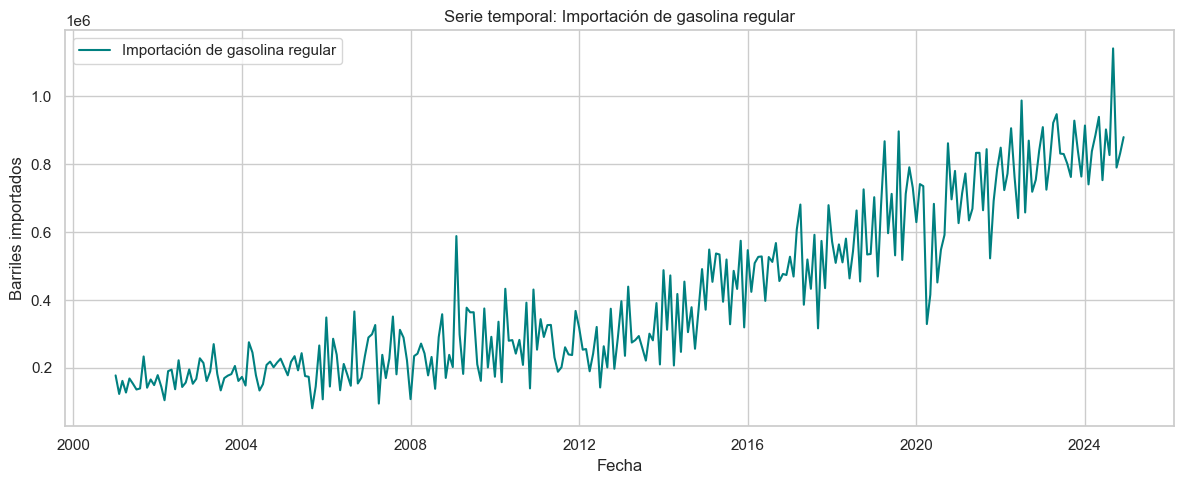

In [7]:

plt.figure(figsize=(12, 5))
plt.plot(import_gasolina_regular, label="Importación de gasolina regular", color="teal")
plt.title("Serie temporal: Importación de gasolina regular")
plt.xlabel("Fecha")
plt.ylabel("Barriles importados")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Explicación 

Tendencia creciente.

Una caída clara en 2020, por la pandemia.

Recuperación y crecimiento en los últimos años.

No hay mayor estacionalidad a lo largo de todos los años tal vez al descomponer

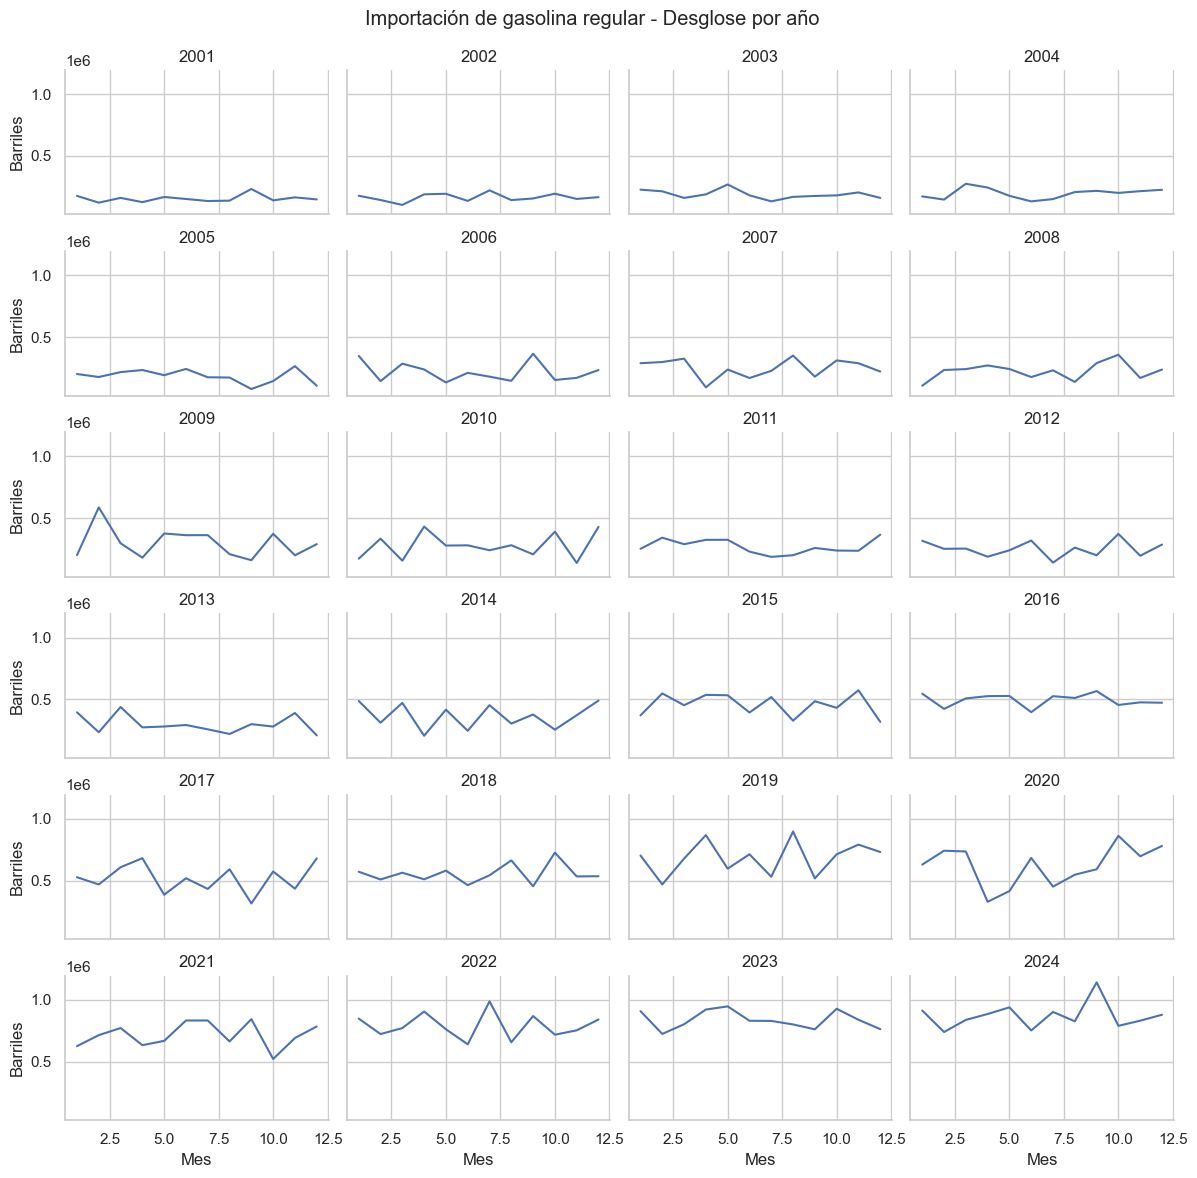

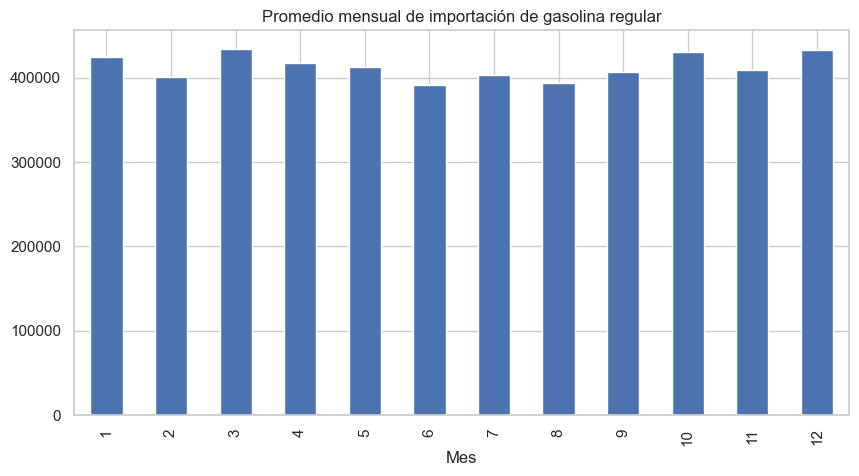

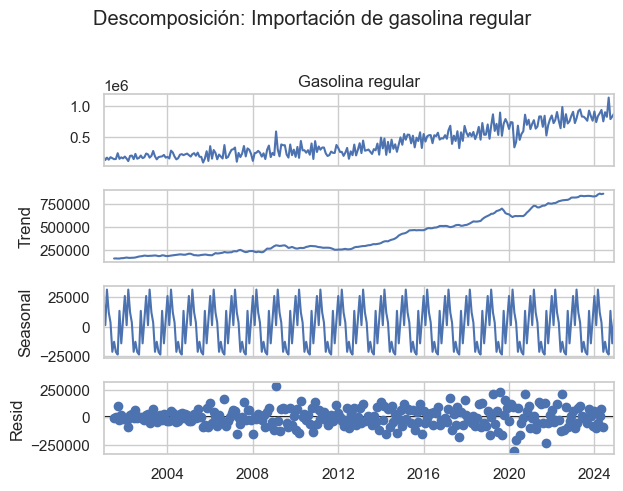

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Crear columna de año y mes
df_yearplot = import_gasolina_regular.reset_index()
df_yearplot["Año"] = df_yearplot["Fecha"].dt.year
df_yearplot["Mes"] = df_yearplot["Fecha"].dt.month

# Crear gráfico
g = sns.FacetGrid(df_yearplot, col="Año", col_wrap=4, height=2, aspect=1.5)
g.map_dataframe(sns.lineplot, x="Mes", y="Gasolina regular")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Mes", "Barriles")
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("Importación de gasolina regular - Desglose por año")
plt.show()


###
importacion_df["Mes"] = importacion_df["Fecha"].dt.month
importacion_df.groupby("Mes")["Gasolina regular"].mean().plot(kind="bar", figsize=(10,5), title="Promedio mensual de importación de gasolina regular")

# Descomposicion por año 12 meses
decomposed = seasonal_decompose(import_gasolina_regular, model='additive', period=12)
decomposed.plot()
plt.suptitle("Descomposición: Importación de gasolina regular", y=1.02)
plt.tight_layout()
plt.show()


1. Serie original (Gasolina regular)

Presenta una tendencia creciente

2. Tendencia

La curva es suavemente creciente

Refleja claramente la no estacionariedad en media, ya que el valor promedio de la serie cambia con el tiempo.

3. Estacionalidad

es cíclica y estable cada 12 meses.

Esto confirma una estacionalidad anual.

La amplitud del componente estacional se mantiene constante lo quw nos empieza a decir el modelo.

4. Ruido

La dispersión del residuo aumenta levemente hacia los últimos años.


Sobre todo la varianza no es estable para mayor cosa por lo qe podemos ayudarnos para el punto d. entonces podriamos transformar.

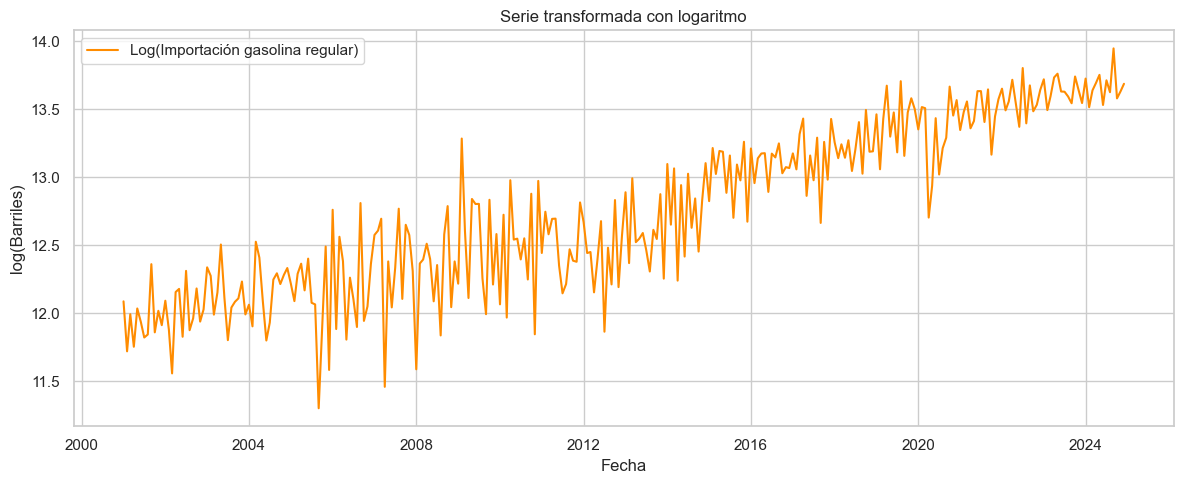

In [9]:
log_serie = np.log(import_gasolina_regular)

plt.figure(figsize=(12, 5))
plt.plot(log_serie, label="Log(Importación gasolina regular)", color="darkorange")
plt.title("Serie transformada con logaritmo")
plt.xlabel("Fecha")
plt.ylabel("log(Barriles)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Sí fue necesario aplicar una transformación logarítmica para estabilizar la varianza antes de modelar.
La serie no es estacionaria en varianza, y el logaritmo ayuda a corregir eso.

Inciso e. si no es estacionaria en media


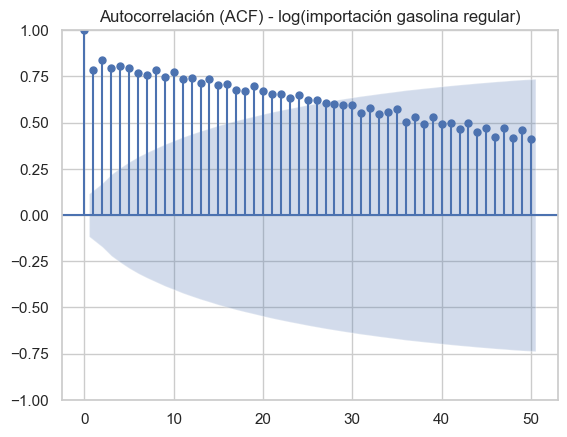

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(log_serie, lags=50)
plt.title("Autocorrelación (ACF) - log(importación gasolina regular)")
plt.show()


El gráfico de autocorrelación muestra que la serie tiene una estructura de dependencia fuerte a largo plazo, con autocorrelaciones que decaen lentamente.
Esto es evidencia clara de que la serie no es estacionaria en media.

Dickey fuller

In [11]:
from statsmodels.tsa.stattools import adfuller

# Prueba ADF
adf_result = adfuller(log_serie)

print("Prueba de Dickey-Fuller Aumentada (ADF)")
print(f"Estadístico ADF: {adf_result[0]}")
print(f"p-valor        : {adf_result[1]}")
print("Valores críticos:")
for key, value in adf_result[4].items():
    print(f"  - {key}: {value}")


Prueba de Dickey-Fuller Aumentada (ADF)
Estadístico ADF: -0.1179250971227434
p-valor        : 0.9476235967263928
Valores críticos:
  - 1%: -3.4544435065994437
  - 5%: -2.8721468827772774
  - 10%: -2.572422013959188


Según la prueba ADF, la serie transformada con logaritmo no es estacionaria en media.
Esto corrobora el incioso i.

Para hacerla estacionaria en media, es necesario aplicar una diferenciación:
diff_log = log_serie.diff().dropna()

Esto elimina la tendencia lineal de la serie y acentra la media, lista para modelado con ARIMA.

Después de analizar la serie, se determinó que no es estacionaria ni en media ni en varianza, y presenta una estacionalidad anual clara.
Por lo tanto, el modelo adecuado no es ARMA ni ARIMA, sino SARIMA.
Se elegirá el orden d = 1 debido a la no estacionariedad en media, y se evaluarán los parámetros p y q con los gráficos ACF y PACF.
Adicionalmente, se probará el algoritmo auto_arima para sugerir un modelo y se comparará su desempeño con los modelos ajustados manualmente.

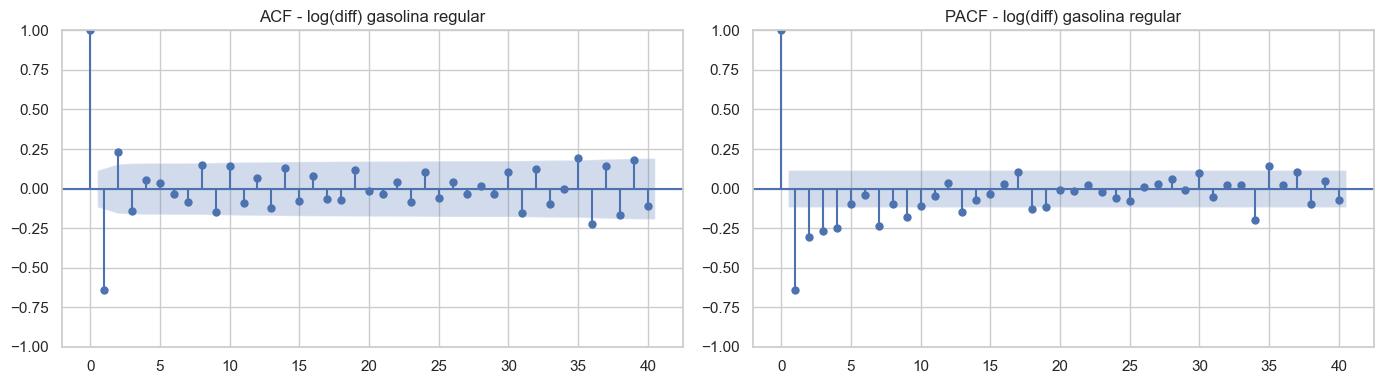

In [12]:

diff_log = log_serie.diff().dropna()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# ACF
plot_acf(diff_log, ax=axes[0], lags=40)
axes[0].set_title("ACF - log(diff) gasolina regular")

# PACF
plot_pacf(diff_log, ax=axes[1], lags=40, method="ywm")
axes[1].set_title("PACF - log(diff) gasolina regular")

plt.tight_layout()
plt.show()



El primer lag tiene una autocorrelación muy fuert.

A partir del lag 2, todas las autocorrelaciones caen dentro del intervalo de confianza.

El comportamiento es clásico de una serie MA(1):

Se espera una caída brusca.

La ACF sugiere que un componente q = 1 es adecuado (modelo MA(1)).


Con base en la ACF y PACF de la serie transformada (log) y diferenciada, se propone un modelo ARIMA(1, 1, 1).

p = 1 por el corte en la PACF

d = 1 por la no estacionariedad en media

q = 1 por el corte en la ACF

In [13]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Lista de modelos a evaluar
modelos = [(1,1,1), (2,1,1), (1,1,2), (2,1,2), (0,1,1), (1,1,0), (0,1,2)]

resultados = []

for orden in modelos:
    modelo = ARIMA(log_serie, order=orden)
    resultado = modelo.fit()
    resultados.append((orden, resultado.aic, resultado.bic))
    print(f"ARIMA{orden} → AIC: {resultado.aic:.2f}, BIC: {resultado.bic:.2f}")


ARIMA(1, 1, 1) → AIC: 49.28, BIC: 60.26
ARIMA(2, 1, 1) → AIC: 50.37, BIC: 65.01
ARIMA(1, 1, 2) → AIC: 49.87, BIC: 64.51
ARIMA(2, 1, 2) → AIC: 51.84, BIC: 70.14
ARIMA(0, 1, 1) → AIC: 63.10, BIC: 70.42
ARIMA(1, 1, 0) → AIC: 128.25, BIC: 135.57
ARIMA(0, 1, 2) → AIC: 51.35, BIC: 62.32


Se probaron múltiples modelos ARIMA con distintos órdenes de p y q.
El modelo con menor AIC fue ARIMA(1,1,1), lo que indica que es el mejor balance entre ajuste y complejidad.
Este modelo será usado como base para comparar luego con Facebook Prophet en el inciso h.

In [14]:
from prophet import Prophet

df_prophet = pd.DataFrame()
df_prophet["ds"] = import_gasolina_regular.index
df_prophet["y"] = np.log(import_gasolina_regular.values) 

df_prophet.head()




Importing plotly failed. Interactive plots will not work.


ds          y
0 2001-01-01  12.088282
1 2001-02-01  11.720882
2 2001-03-01  11.993661
3 2001-04-01  11.754606
4 2001-05-01  12.036056

15:30:19 - cmdstanpy - INFO - Chain [1] start processing
15:30:19 - cmdstanpy - INFO - Chain [1] done processing


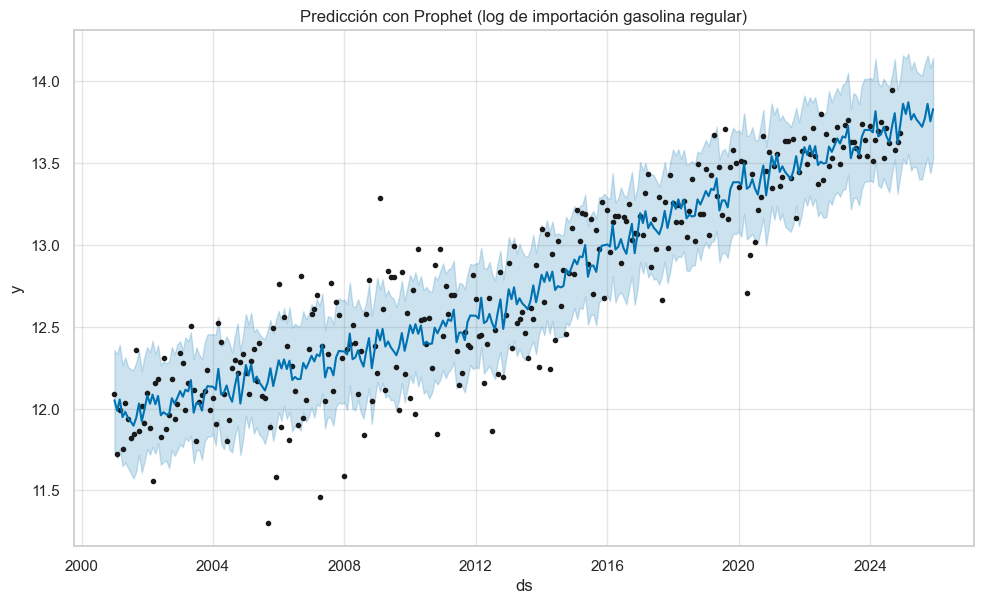

In [15]:
modelo_prophet = Prophet(yearly_seasonality=True)
modelo_prophet.fit(df_prophet)

future = modelo_prophet.make_future_dataframe(periods=12, freq='MS')
forecast = modelo_prophet.predict(future)

modelo_prophet.plot(forecast)
plt.title("Predicción con Prophet (log de importación gasolina regular)")
plt.show()



In [16]:
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima.model import ARIMA
modelo_arima = ARIMA(np.log(import_gasolina_regular), order=(1,1,1)).fit()
pred_arima = modelo_arima.predict(start=1, end=len(import_gasolina_regular)-1)

pred_prophet = forecast.set_index("ds").loc[import_gasolina_regular.index]["yhat"]

y_real = np.log(import_gasolina_regular)
arima_rmse = np.sqrt(mean_squared_error(y_real[1:], pred_arima))
prophet_rmse = np.sqrt(mean_squared_error(y_real, pred_prophet))

print(f"RMSE ARIMA: {arima_rmse:.4f}")
print(f"RMSE Prophet: {prophet_rmse:.4f}")


RMSE ARIMA: 0.2608
RMSE Prophet: 0.2445


El modelo Prophet obtuvo un menor error cuadrático medio (RMSE) en los datos transformados con logaritmo, lo que indica que funcionó mejor en capturar la dinámica de la serie que el modelo ARIMA (1,1,1) seleccionado.

PREGUNTA A INTELIGENCIA ARTIFICIAL:

"*Prophet modela la tendencia no lineal de forma más flexible.*

*También ajusta automáticamente la estacionalidad anual, sin necesidad de que nosotros la especifiquemos como en SARIMA.*

*Puede adaptarse mejor a cambios estructurales o perturbaciones (como las de 2020).*"

## Serie 2 -  importación de gasolina Superior



In [17]:
import_gasolina_superior = importacion_df.set_index("Fecha")["Gasolina superior"]

print("Serie: Importación de gasolina superior")
print(f"- Inicio     : {import_gasolina_superior.index.min().date()}")
print(f"- Fin        : {import_gasolina_superior.index.max().date()}")
print(f"- Total de observaciones: {len(import_gasolina_superior)}")


Serie: Importación de gasolina superior
- Inicio     : 2001-01-01
- Fin        : 2024-12-01
- Total de observaciones: 288


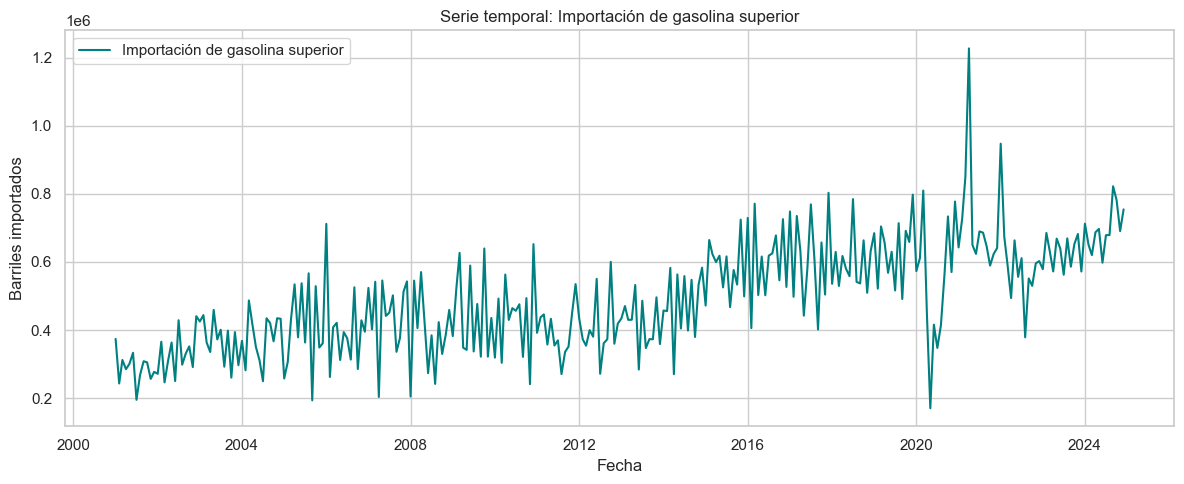

In [18]:

plt.figure(figsize=(12, 5))
plt.plot(import_gasolina_superior, label="Importación de gasolina superior", color="teal")
plt.title("Serie temporal: Importación de gasolina superior")
plt.xlabel("Fecha")
plt.ylabel("Barriles importados")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Explicación 

La serie muestra una tendencia creciente

Se observa una alta variabilidad en los datos, con algunos picos muy marcados.

Una caída pronunciada alrededor de 2020, por la pandemia.

En los años posteriores, se nota una recuperación progresiva.

A simple vista, no se nota una estacionalidad.

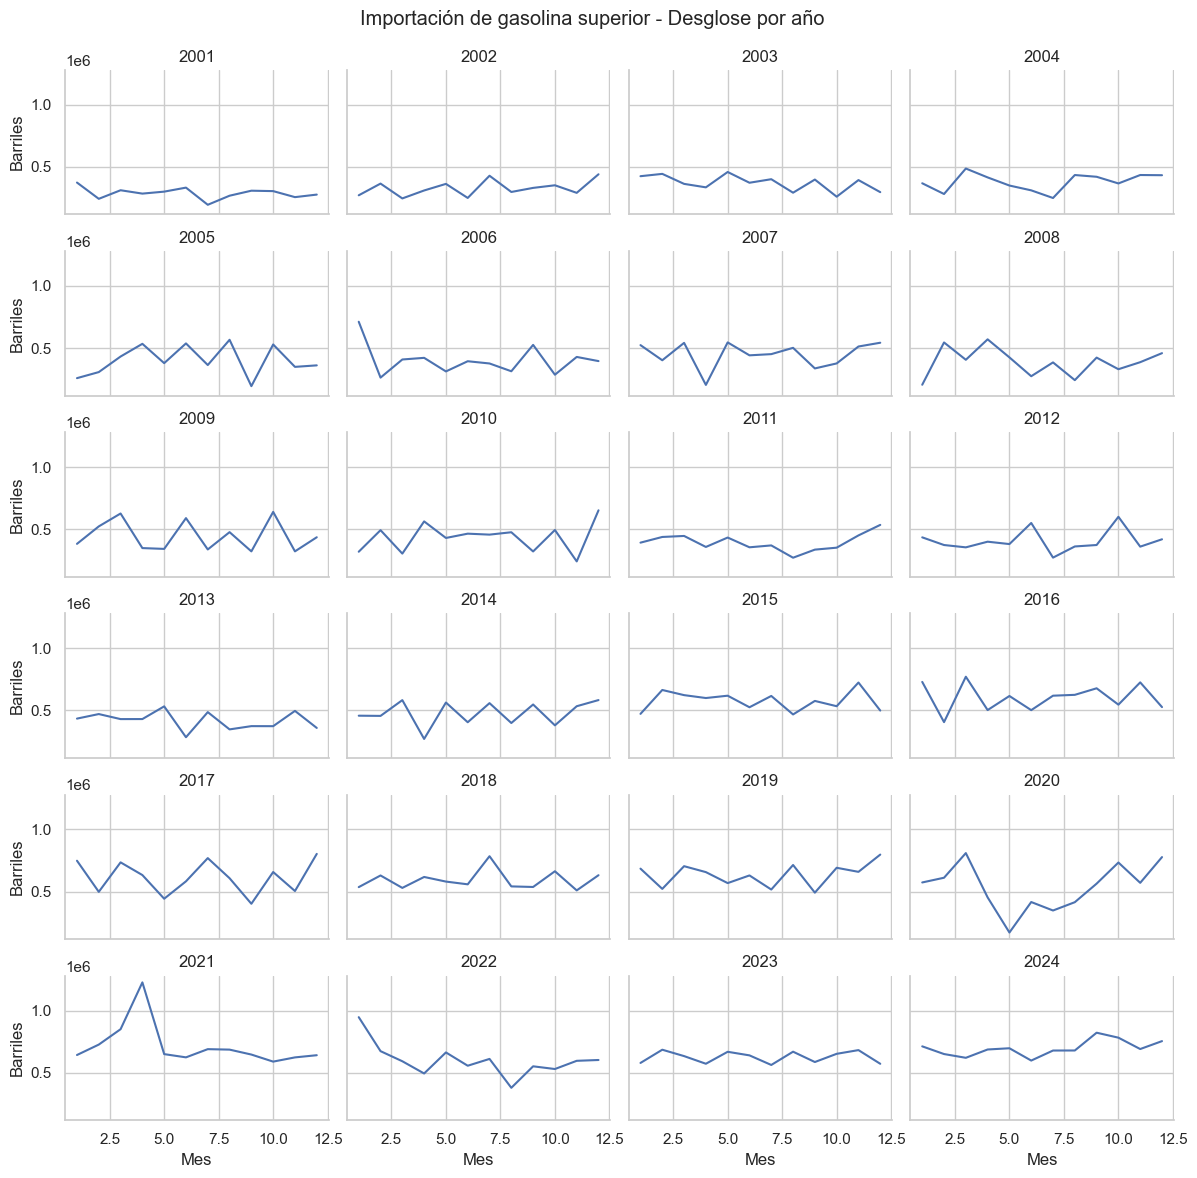

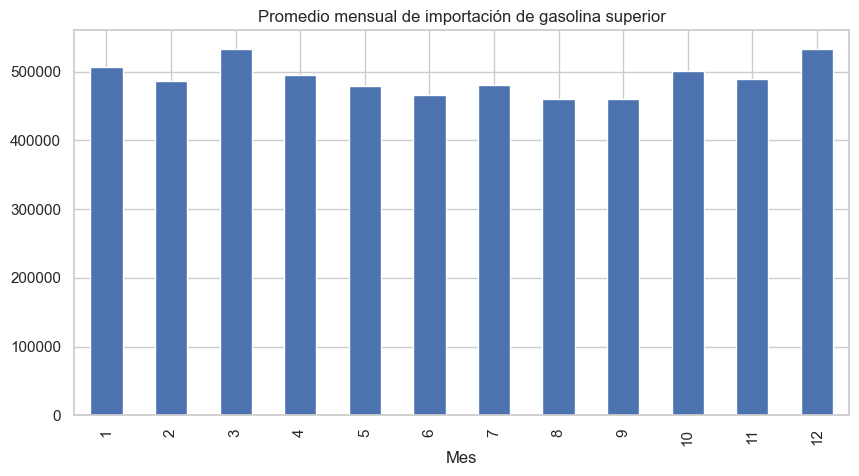

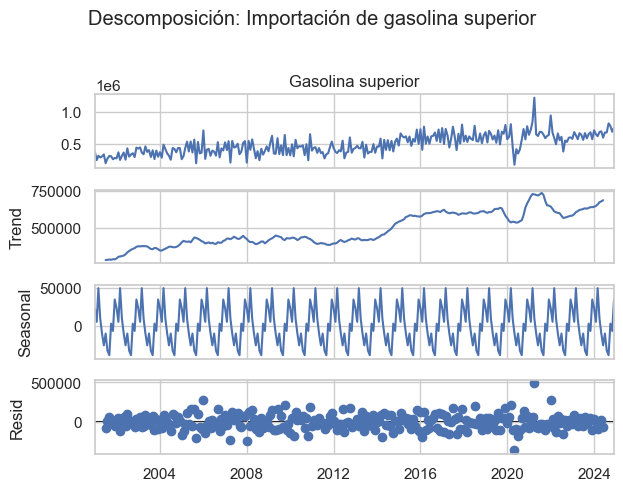

In [19]:

# Crear columna de año y mes
df_yearplot = import_gasolina_superior.reset_index()
df_yearplot["Año"] = df_yearplot["Fecha"].dt.year
df_yearplot["Mes"] = df_yearplot["Fecha"].dt.month

# Crear gráfico
g = sns.FacetGrid(df_yearplot, col="Año", col_wrap=4, height=2, aspect=1.5)
g.map_dataframe(sns.lineplot, x="Mes", y="Gasolina superior")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Mes", "Barriles")
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("Importación de gasolina superior - Desglose por año")
plt.show()


###
importacion_df["Mes"] = importacion_df["Fecha"].dt.month
importacion_df.groupby("Mes")["Gasolina superior"].mean().plot(kind="bar", figsize=(10,5), title="Promedio mensual de importación de gasolina superior")

# Descomposicion por año 12 meses
decomposed = seasonal_decompose(import_gasolina_superior, model='additive', period=12)
decomposed.plot()
plt.suptitle("Descomposición: Importación de gasolina superior", y=1.02)
plt.tight_layout()
plt.show()


A primera vista podemos ver como la gasoliina superior tiende a tener picos mas pronunciados que regular.

Tendencia:

Se observa una tendencia creciente.

Entre 2015 y 2018, la tendencia se estabiliza en valores altos y luego la caida del covid

A partir de 2021, hay una recuperación gradual.

Estacionalidad:

La serie presenta una estacionalidad mensual muy marcada.


Ruido:

están en su mayoría centrados alrededor de cero

se observan algunos valores atípicos, especialmente después de 2019, 


Nuevamente sí, es necesario transformar la serie, para estabilizar la varianza.

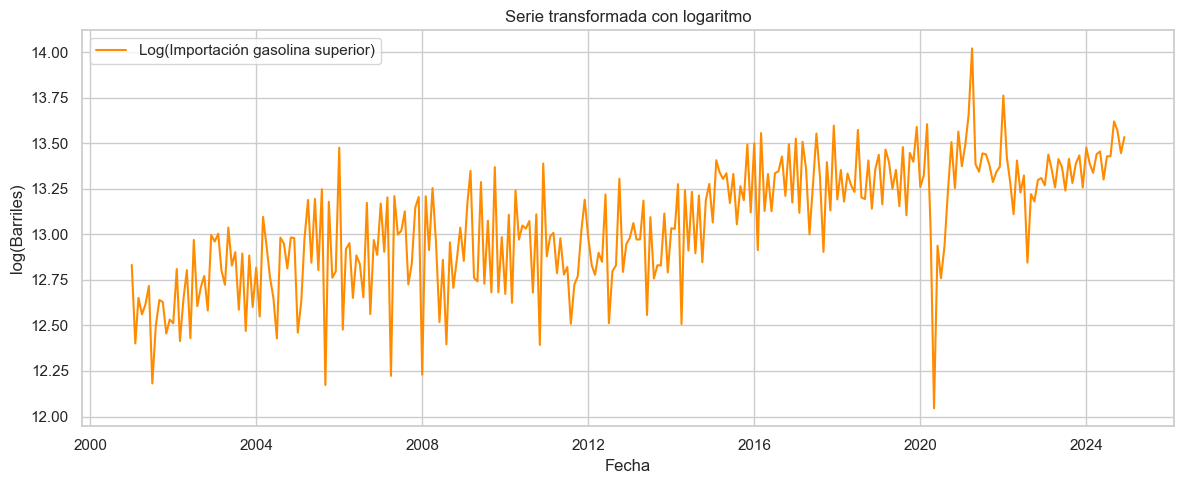

In [22]:
log_serie_sup = np.log(import_gasolina_superior)

plt.figure(figsize=(12, 5))
plt.plot(log_serie_sup, label="Log(Importación gasolina superior)", color="darkorange")
plt.title("Serie transformada con logaritmo")
plt.xlabel("Fecha")
plt.ylabel("log(Barriles)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


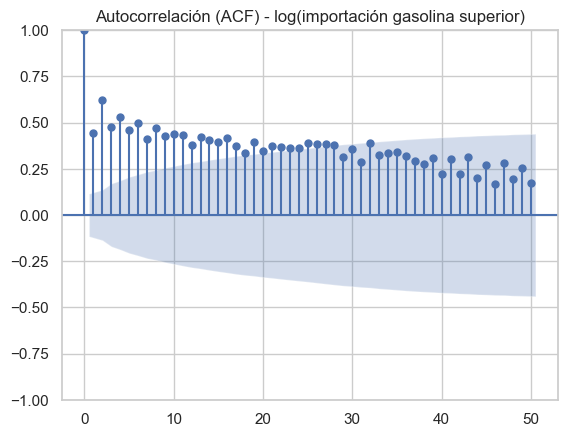

In [23]:

plot_acf(log_serie_sup, lags=50)
plt.title("Autocorrelación (ACF) - log(importación gasolina superior)")
plt.show()


La serie logarítmica no es estacionaria en media, como lo indica:

La alta autocorrelación inicial,

El decaimiento lento de los valores de Acf.

In [24]:

# Prueba ADF
adf_result = adfuller(log_serie_sup)

print("Prueba de Dickey-Fuller Aumentada (ADF)")
print(f"Estadístico ADF: {adf_result[0]}")
print(f"p-valor        : {adf_result[1]}")
print("Valores críticos:")
for key, value in adf_result[4].items():
    print(f"  - {key}: {value}")


Prueba de Dickey-Fuller Aumentada (ADF)
Estadístico ADF: -2.270770144027168
p-valor        : 0.1815685154763218
Valores críticos:
  - 1%: -3.4537536300652
  - 5%: -2.8718443180148836
  - 10%: -2.572260641818822


La hipótesis nula de la prueba ADF es que la serie NO es estacionaria en media.

Como el estadístico ADF es mayor que todos los valores críticos, no se puede rechazar la hipótesis nula.


Conclusión: La prueba confirma que la serie transformada con logaritmo no es estacionaria en media.

Y para hacerla estacionaria deberiamos diff_log = log_serie_sup.diff().dropna()


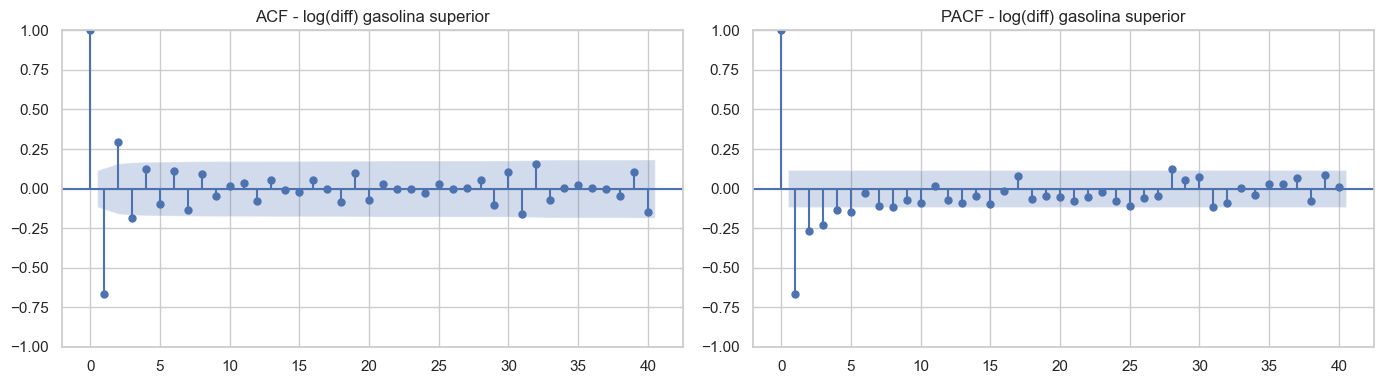

In [25]:

diff_log = log_serie_sup.diff().dropna()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# ACF
plot_acf(diff_log, ax=axes[0], lags=40)
axes[0].set_title("ACF - log(diff) gasolina superior")

# PACF
plot_pacf(diff_log, ax=axes[1], lags=40, method="ywm")
axes[1].set_title("PACF - log(diff) gasolina superior")

plt.tight_layout()
plt.show()



Modelo ARIMA(1,1,1) es una buena primera elección para esta serie:

p = 1 (por el corte en PACF),

d = 1 (porque diferenciamos una vez),

q = 1 (por el corte en ACF).

In [26]:

warnings.filterwarnings("ignore")

# Lista de modelos a evaluar
modelos = [(1,1,1), (2,1,1), (1,1,2), (2,1,2), (0,1,1), (1,1,0), (0,1,2)]

resultados = []

for orden in modelos:
    modelo = ARIMA(log_serie_sup, order=orden)
    resultado = modelo.fit()
    resultados.append((orden, resultado.aic, resultado.bic))
    print(f"ARIMA{orden} → AIC: {resultado.aic:.2f}, BIC: {resultado.bic:.2f}")


ARIMA(1, 1, 1) → AIC: -8.51, BIC: 2.46
ARIMA(2, 1, 1) → AIC: -16.04, BIC: -1.40
ARIMA(1, 1, 2) → AIC: -13.61, BIC: 1.03
ARIMA(2, 1, 2) → AIC: -14.10, BIC: 4.19
ARIMA(0, 1, 1) → AIC: 1.18, BIC: 8.50
ARIMA(1, 1, 0) → AIC: 43.29, BIC: 50.61
ARIMA(0, 1, 2) → AIC: -4.38, BIC: 6.60


El modelo ARIMA(2,1,1) es el mejor entre los evaluados para estimar la serie log-transformada de importación de gasolina superior, ya que presenta los valores más bajos tanto de AIC como de BIC. Esto indica un equilibrio adecuado entre ajuste y parsimonia.

In [27]:

df_prophet = pd.DataFrame()
df_prophet["ds"] = import_gasolina_superior.index
df_prophet["y"] = np.log(import_gasolina_superior.values) 

df_prophet.head()




ds          y
0 2001-01-01  12.831915
1 2001-02-01  12.401191
2 2001-03-01  12.651029
3 2001-04-01  12.560437
4 2001-05-01  12.614579

16:54:28 - cmdstanpy - INFO - Chain [1] start processing
16:54:28 - cmdstanpy - INFO - Chain [1] done processing


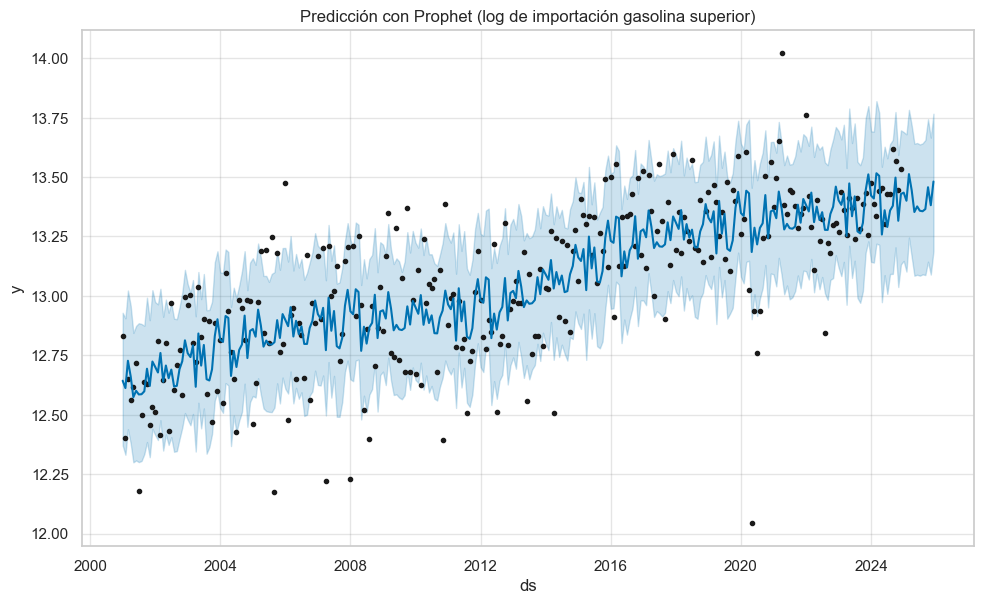

In [28]:
modelo_prophet = Prophet(yearly_seasonality=True)
modelo_prophet.fit(df_prophet)

future = modelo_prophet.make_future_dataframe(periods=12, freq='MS')
forecast = modelo_prophet.predict(future)

modelo_prophet.plot(forecast)
plt.title("Predicción con Prophet (log de importación gasolina superior)")
plt.show()



In [31]:
modelo_arima = ARIMA(np.log(import_gasolina_superior), order=(2,1,1)).fit()
pred_arima = modelo_arima.predict(start=1, end=len(import_gasolina_superior)-1)

pred_prophet = forecast.set_index("ds").loc[import_gasolina_superior.index]["yhat"]

y_real = np.log(import_gasolina_superior)
arima_rmse = np.sqrt(mean_squared_error(y_real[1:], pred_arima))
prophet_rmse = np.sqrt(mean_squared_error(y_real, pred_prophet))

print(f"RMSE ARIMA: {arima_rmse:.4f}")
print(f"RMSE Prophet: {prophet_rmse:.4f}")


RMSE ARIMA: 0.2323
RMSE Prophet: 0.2197


Nuevamente el modelo Prophet obtuvo un menor error cuadrático medio (RMSE) en los datos transformados con logaritmo, lo que indica que funcionó mejor en capturar la dinámica de la serie que el modelo ARIMA (2,1,1) seleccionado.

La diferencia no es extremadamente grande, pero sí lo suficiente como para preferir Prophet, especialmente si consideramos que también:

maneja automáticamente la estacionalidad y los días festivos,

permite mayor flexibilidad ante cambios estructurales en la tendencia.

# Serie 3 - importación de diesel alto azufre

In [46]:
# Asegurar que la columna 'Fecha' esté en formato datetime (por si acaso)
importacion_df["Fecha"] = pd.to_datetime(importacion_df["Fecha"], format="%Y-%m-%d", errors="coerce")

# Filtrar solo hasta el 31 de diciembre de 2017
import_diesel = importacion_df.set_index("Fecha")["Diesel alto azufre"]
import_diesel = import_diesel.loc[:'2017-12-31']

# Imprimir resumen
print("Serie: Importación de diesel (hasta 2017)")
print(f"- Inicio     : {import_diesel.index.min().date()}")
print(f"- Fin        : {import_diesel.index.max().date()}")
print(f"- Total de observaciones: {len(import_diesel)}")


Serie: Importación de diesel (hasta 2017)
- Inicio     : 2001-01-01
- Fin        : 2017-12-01
- Total de observaciones: 204


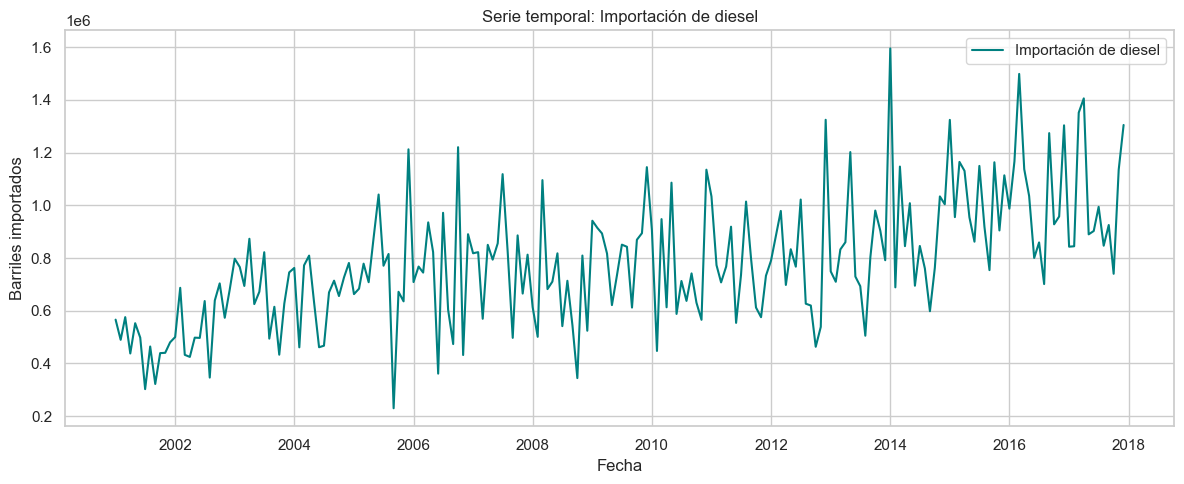

In [47]:

plt.figure(figsize=(12, 5))
plt.plot(import_diesel, label="Importación de diesel", color="teal")
plt.title("Serie temporal: Importación de diesel")
plt.xlabel("Fecha")
plt.ylabel("Barriles importados")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Tendencia general

Entre 2000 y 2018 aproximadamente, se observa una tendencia creciente moderadamente irregular en la importación de diésel. Hay fluctuaciones mes a mes, pero en general el volumen importado aumenta, alcanzando picos por encima de 1.6 millones de barriles.

A partir de finales de 2018/principios de 2019, la serie cae bruscamente a cero porque fue por la Regulación nacional: entrada en vigor del reglamento COGUANOR, Impacto en salud pública y ambiente y basicamente que ahora casi solo se usa bajo en azufre 

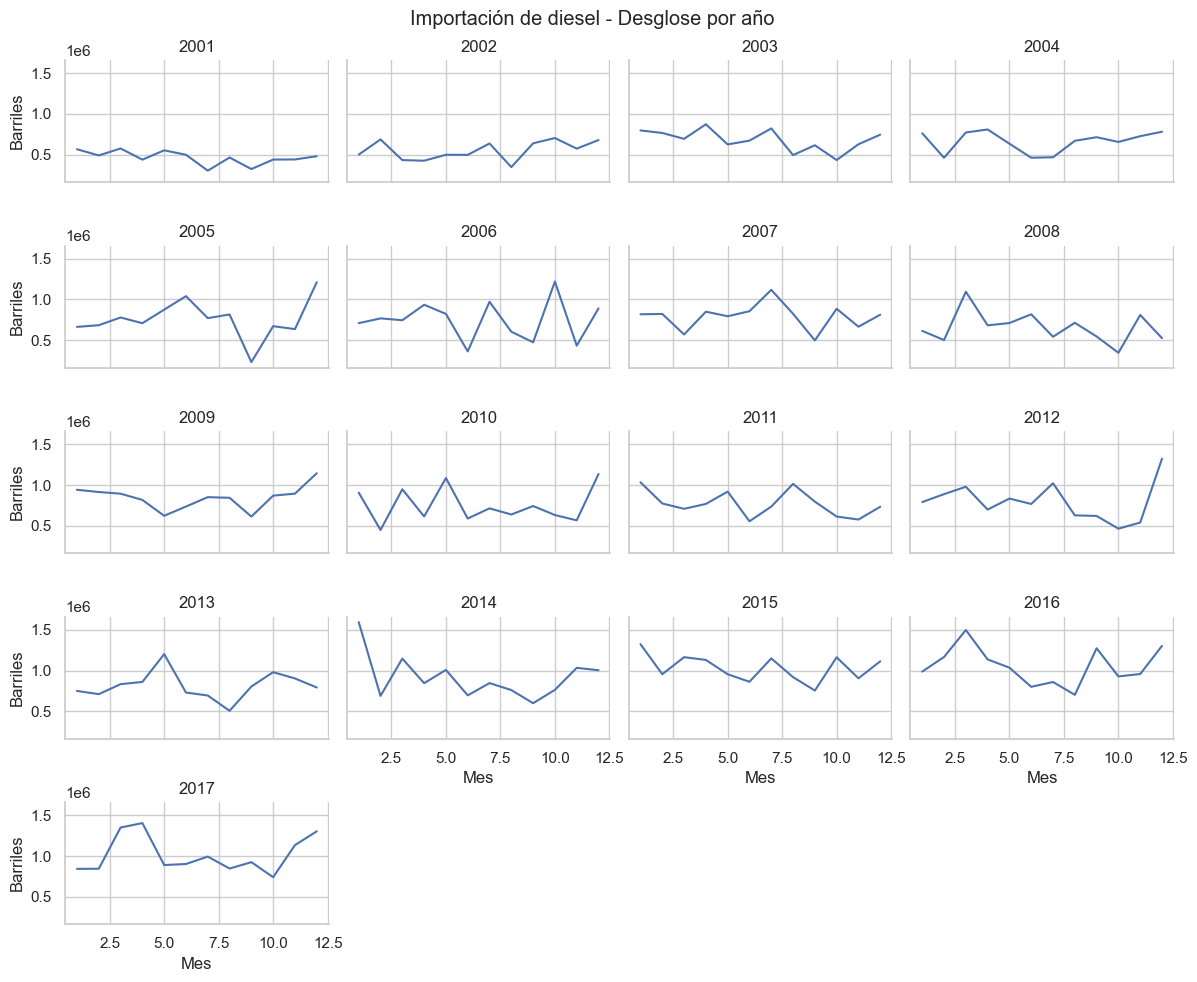

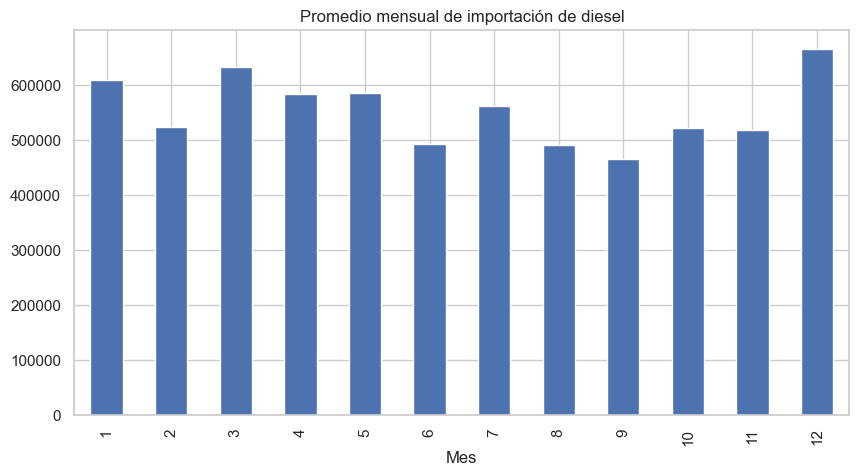

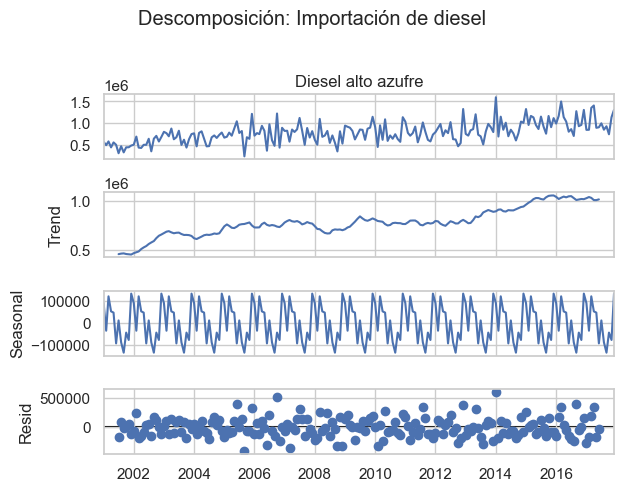

In [48]:
# Crear columna de año y mes
df_yearplot = import_diesel.reset_index()
df_yearplot["Año"] = df_yearplot["Fecha"].dt.year
df_yearplot["Mes"] = df_yearplot["Fecha"].dt.month

# Crear gráfico
g = sns.FacetGrid(df_yearplot, col="Año", col_wrap=4, height=2, aspect=1.5)
g.map_dataframe(sns.lineplot, x="Mes", y="Diesel alto azufre")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Mes", "Barriles")
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("Importación de diesel - Desglose por año")
plt.show()


###
importacion_df["Mes"] = importacion_df["Fecha"].dt.month
importacion_df.groupby("Mes")["Diesel alto azufre"].mean().plot(kind="bar", figsize=(10,5), title="Promedio mensual de importación de diesel")

# Descomposicion por año 12 meses
decomposed = seasonal_decompose(import_diesel, model='additive', period=12)
decomposed.plot()
plt.suptitle("Descomposición: Importación de diesel", y=1.02)
plt.tight_layout()
plt.show()


1. Serie original

La serie muestra un crecimiento moderado e inestable hasta aproximadamente 2017–2018, seguido de la caida

2. Tendencia

La tendencia se comporta como una curva suavemente creciente hasta 2017

3. Estacionalidad

Se observa una estacionalidad clara y estable de ciclo anual. El componente estacional muestra picos y valles recurrentes a lo largo de los años.

La amplitud es constante, lo que es deseable para modelado y sugiere que, incluso si hay una tendencia, la estacionalidad se mantiene predecible.

4. Ruido

Los residuos están distribuidos de manera más o menos estable hasta 2017


Sí fue necesario aplicar una transformación logarítmica para estabilizar la varianza antes de modelar.
La serie no es estacionaria en varianza, y el logaritmo ayuda a corregir eso.

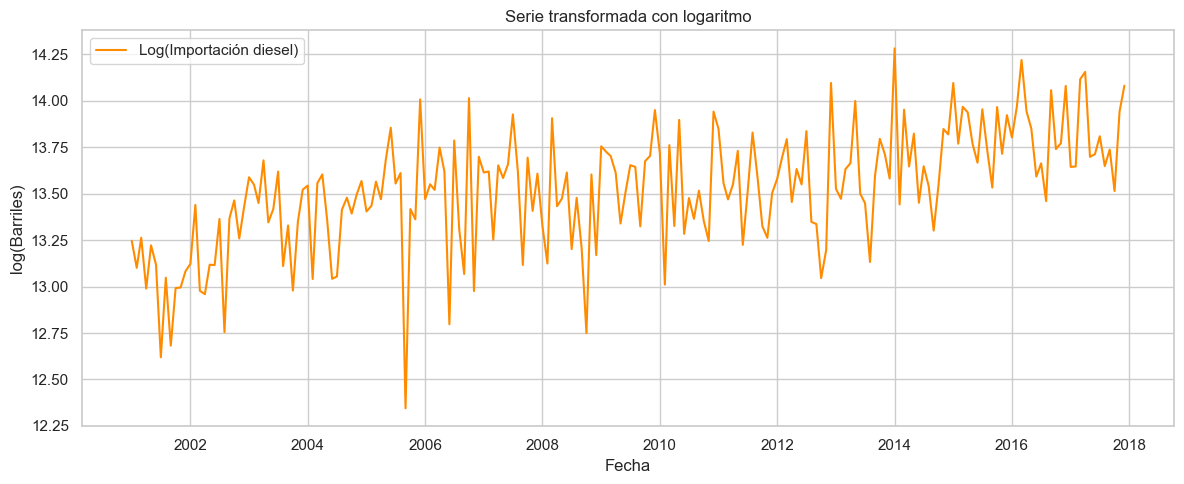

In [49]:
log_serie = np.log(import_diesel)

plt.figure(figsize=(12, 5))
plt.plot(log_serie, label="Log(Importación diesel)", color="darkorange")
plt.title("Serie transformada con logaritmo")
plt.xlabel("Fecha")
plt.ylabel("log(Barriles)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

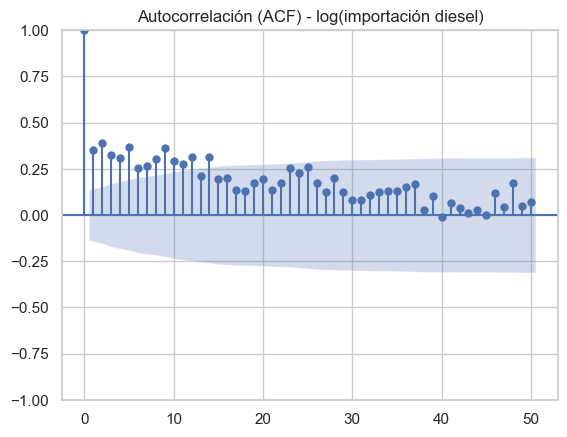

In [52]:
plot_acf(log_serie, lags=50)
plt.title("Autocorrelación (ACF) - log(importación diesel)")
plt.show()

La serie no es estacionaria en media, a pesar de la transformación logarítmica. Esto se evidencia por:

Alta autocorrelación en los primeros rezagos.

Decaimiento lento de la ACF.

Valores significativos más allá del primer lag.

In [51]:

resultado_adf = adfuller(log_serie)
print(f'Estadístico ADF: {resultado_adf[0]}')
print(f'Valor p: {resultado_adf[1]}')
for clave, valor in resultado_adf[4].items():
    print(f'Valor crítico {clave}: {valor}')


Estadístico ADF: -2.336655463558473
Valor p: 0.16041816940936637
Valor crítico 1%: -3.4648754262570978
Valor crítico 5%: -2.876714157488788
Valor crítico 10%: -2.574858699001736


El valor p = 0.160 es mayor que 0.05, por lo tanto, no se rechaza la hipótesis nula de que la serie tiene raíz unitaria → la serie no es estacionaria en media.

El estadístico ADF (−2.337) es mayor que todos los valores críticos (−3.465, −2.877 y −2.575), lo cual confirma la no estacionariedad.

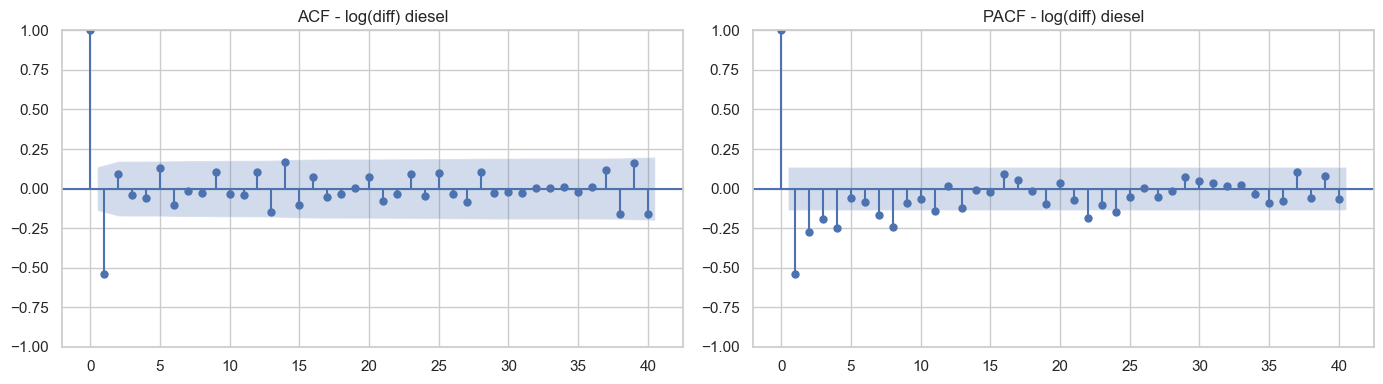

In [53]:
log_diesel_diff = log_serie.diff().dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# ACF
plot_acf(log_diesel_diff, ax=axes[0], lags=40)
axes[0].set_title("ACF - log(diff) diesel")

# PACF
plot_pacf(log_diesel_diff, ax=axes[1], lags=40, method="ywm")
axes[1].set_title("PACF - log(diff) diesel")

plt.tight_layout()
plt.show()



In [ ]:


warnings.filterwarnings("ignore")

modelos_arima = [(1,1,1), (2,1,1), (1,1,2), (2,1,2), (0,1,1), (1,1,0), (0,1,2)]

print("Evaluación de modelos ARIMA")
resultados_arima = []
for orden in modelos_arima:
    modelo = ARIMA(log_serie, order=orden)
    resultado = modelo.fit()
    resultados_arima.append((orden, resultado.aic, resultado.bic))
    print(f"ARIMA{orden} → AIC: {resultado.aic:.2f}, BIC: {resultado.bic:.2f}")


Evaluación de modelos ARIMA
ARIMA(1, 1, 1) → AIC: 47.02, BIC: 56.96
ARIMA(2, 1, 1) → AIC: 48.23, BIC: 61.49
ARIMA(1, 1, 2) → AIC: 48.74, BIC: 61.99
ARIMA(2, 1, 2) → AIC: 50.16, BIC: 66.73
ARIMA(0, 1, 1) → AIC: 45.13, BIC: 51.75
ARIMA(1, 1, 0) → AIC: 99.55, BIC: 106.18
ARIMA(0, 1, 2) → AIC: 47.03, BIC: 56.97


en este caso ha sido 011 el mejor 

In [55]:

df_prophet = pd.DataFrame()
df_prophet["ds"] = import_diesel.index
df_prophet["y"] = np.log(import_diesel.values) 

df_prophet.head()

ds          y
0 2001-01-01  13.246530
1 2001-02-01  13.101192
2 2001-03-01  13.263098
3 2001-04-01  12.989393
4 2001-05-01  13.222406

18:09:31 - cmdstanpy - INFO - Chain [1] start processing
18:09:31 - cmdstanpy - INFO - Chain [1] done processing


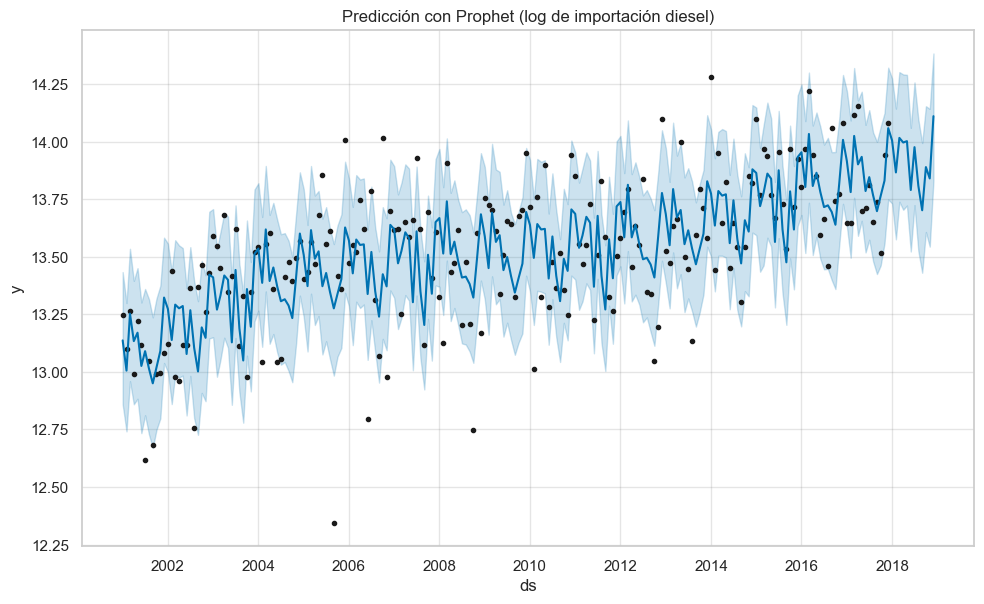

In [56]:
modelo_prophet = Prophet(yearly_seasonality=True)
modelo_prophet.fit(df_prophet)

future = modelo_prophet.make_future_dataframe(periods=12, freq='MS')
forecast = modelo_prophet.predict(future)

modelo_prophet.plot(forecast)
plt.title("Predicción con Prophet (log de importación diesel)")
plt.show()

In [57]:

modelo_arima = ARIMA(np.log(import_diesel), order=(1,1,1)).fit()
pred_arima = modelo_arima.predict(start=1, end=len(import_diesel)-1)

pred_prophet = forecast.set_index("ds").loc[import_diesel.index]["yhat"]

y_real = np.log(import_diesel)
arima_rmse = np.sqrt(mean_squared_error(y_real[1:], pred_arima))
prophet_rmse = np.sqrt(mean_squared_error(y_real, pred_prophet))

print(f"RMSE ARIMA: {arima_rmse:.4f}")
print(f"RMSE Prophet: {prophet_rmse:.4f}")


RMSE ARIMA: 0.2671
RMSE Prophet: 0.2203


Por tervera vez prophet ha sido mejor y es que cuando evaluamos que prophet tambien tiene en cuenta las festividades(cambios de tendencias), tiene sentido porque estas son las que mas tienden a hacer los picos que causan el error en arima. 

## **Serie 1 de consumos, Gasolina Regular**

In [1]:
import pandas as pd

# Paso a: Leer CSV y preparar la serie de consumo de Gasolina regular
consumo_df = pd.read_csv('consumos_combustibles.csv', parse_dates=['Fecha'])
consumo_df = consumo_df.set_index('Fecha').sort_index()

# Extraer la serie univariante
serie_regular = consumo_df['Gasolina regular']

# a. Especificar Inicio, Fin y Frecuencia
inicio = serie_regular.index.min().date()
fin    = serie_regular.index.max().date()
freq_inferida = serie_regular.index.inferred_freq

print(f"Inicio: {inicio}")
print(f"Fin   : {fin}")
print(f"Frecuencia inferida: {freq_inferida}")

# Asegurar frecuencia mensual (mes de inicio)
serie_regular = serie_regular.asfreq('MS')
print(f"Frecuencia tras asfreq: {serie_regular.index.freq}")


Inicio: 2000-01-01
Fin   : 2024-12-01
Frecuencia inferida: MS
Frecuencia tras asfreq: <MonthBegin>


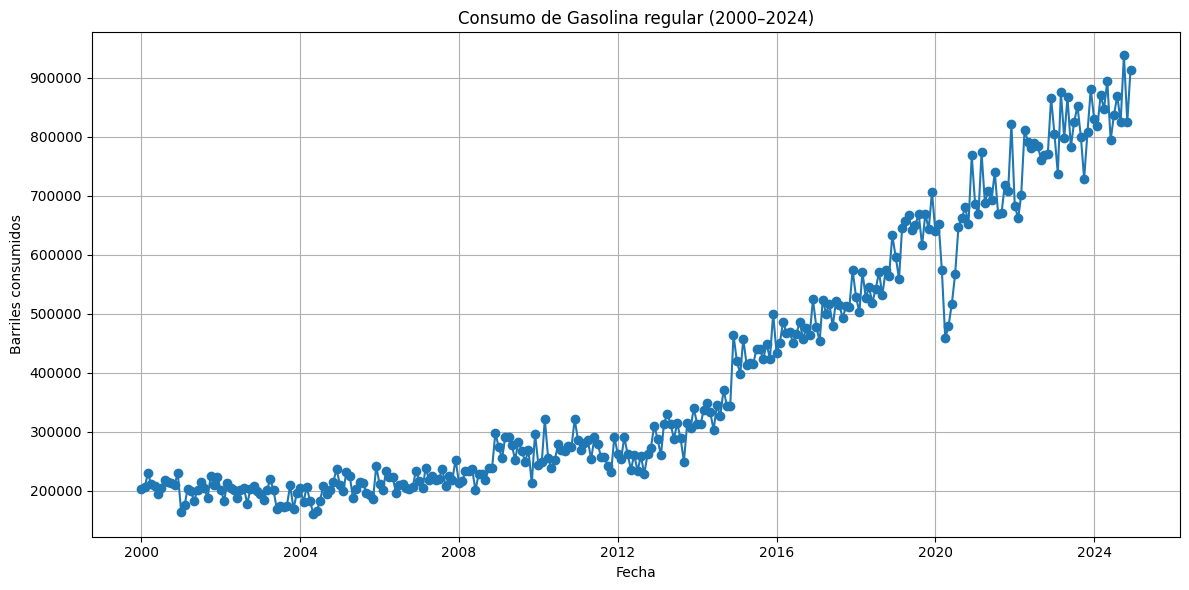

In [2]:
import matplotlib.pyplot as plt

# inciso b: gráfico de la serie de consumo de Gasolina regular
plt.figure(figsize=(12, 6))
plt.plot(serie_regular, marker='o', linestyle='-')
plt.title('Consumo de Gasolina regular (2000–2024)')
plt.xlabel('Fecha')
plt.ylabel('Barriles consumidos')
plt.grid(True)
plt.tight_layout()
plt.show()


## Impresiones a primera vista

- **Tendencia creciente a largo plazo**  
  Desde 2000 hasta 2024 se observa un claro aumento en el consumo mensual de gasolina regular, pasando de alrededor de 200 000 barriles a casi 950 000.

- **Periodo de crecimiento moderado (2000–2012)**  
  Entre 2000 y aproximadamente 2012 la serie crece de forma suave, con variaciones alrededor de los 180 000–300 000 barriles.

- **Aceleración del crecimiento (2012–2019)**  
  A partir de 2012 la pendiente de la curva se hace más pronunciada, indicando un incremento más rápido del consumo, alcanzando valores superiores a 500 000 barriles antes de 2020.

- **Impacto de la pandemia en 2020**  
  En marzo‑abril de 2020 se aprecia una caída abrupta (hasta cerca de 450 000 barriles), atribuible a las restricciones por COVID‑19.

- **Recuperación post‑pandemia (2021–2024)**  
  Después de la caída, la serie se recupera con fuerza y retoma la tendencia alcista, superando los 800 000 barriles desde 2022.

- **Variabilidad y ruido creciente**  
  Las oscilaciones mensuales se hacen más amplias en los años recientes, lo que sugiere mayor volatilidad en el consumo (picos y valles más marcados).

- **Posible estacionalidad**  
  Aunque no es perfectamente regular, se aprecia un patrón de subidas y bajadas cíclicas anuales que vale la pena descomponer para confirmar su estabilidad.


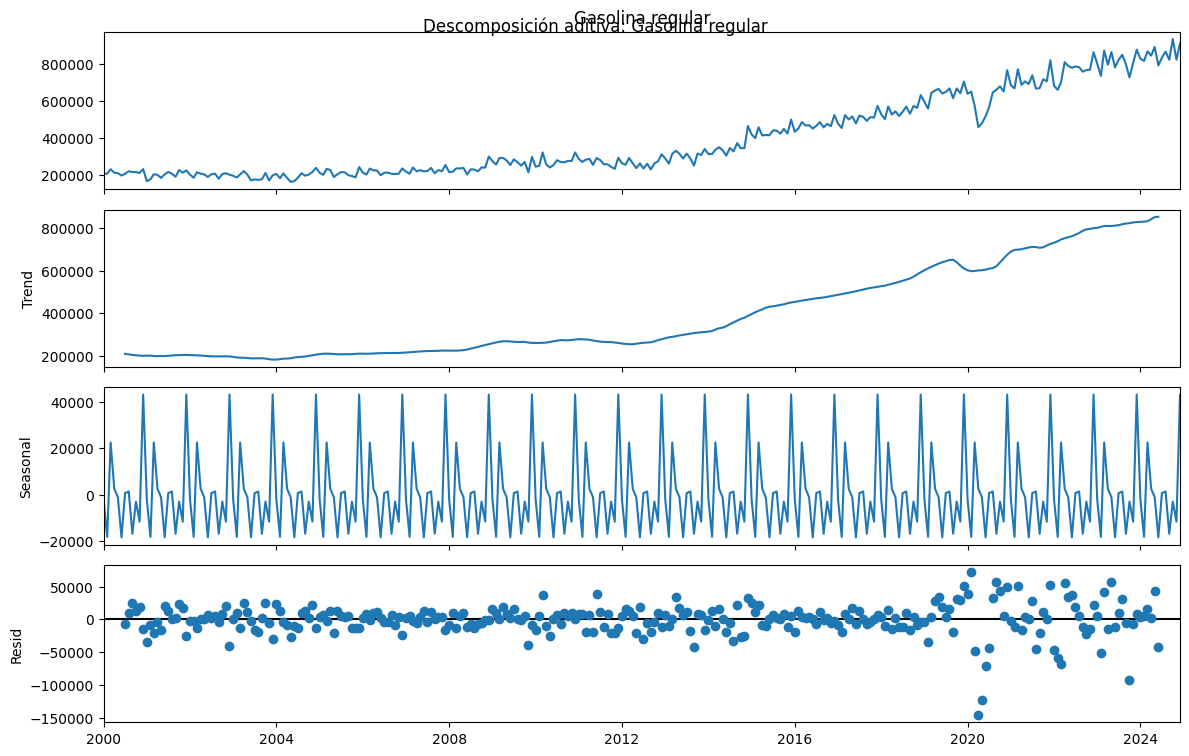

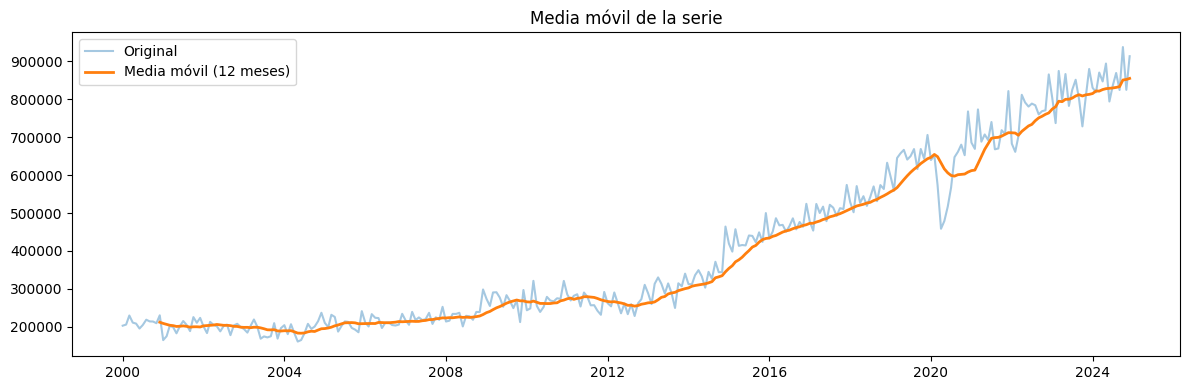

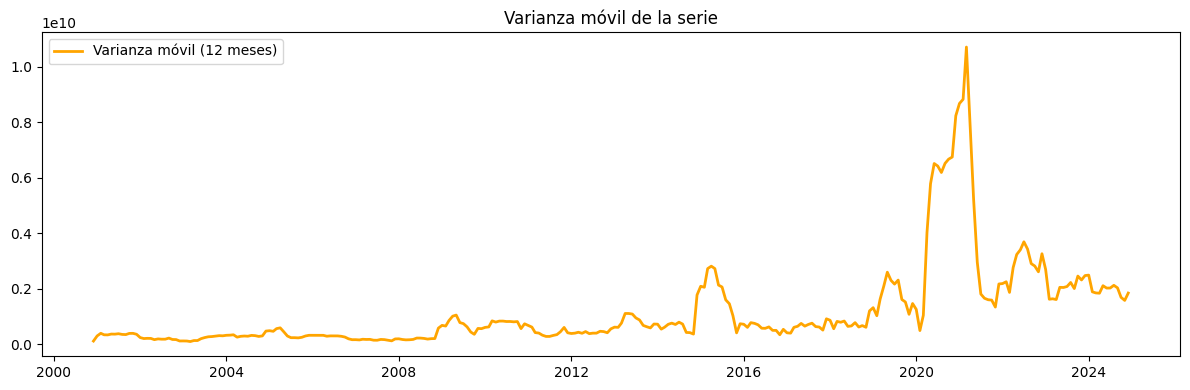

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Punto c: descomposición de la serie de consumo de Gasolina regular

# 1) Descomposición aditiva (periodo 12 meses)
decomp = seasonal_decompose(serie_regular, model='additive', period=12)

# 2) Graficar componentes
fig = decomp.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Descomposición aditiva: Gasolina regular', y=0.93)
plt.tight_layout()
plt.show()

# 3) Cálculo de media y varianza móviles (window=12) para inspección de estacionariedad
rolling_mean = serie_regular.rolling(window=12).mean()
rolling_var  = serie_regular.rolling(window=12).var()

plt.figure(figsize=(12, 4))
plt.plot(serie_regular,      label='Original', alpha=0.4)
plt.plot(rolling_mean,       label='Media móvil (12 meses)', linewidth=2)
plt.title('Media móvil de la serie')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(rolling_var,        label='Varianza móvil (12 meses)', color='orange', linewidth=2)
plt.title('Varianza móvil de la serie')
plt.legend()
plt.tight_layout()
plt.show()


## Análisis de los gráficos de descomposición (inciso c)

1. **Tendencia (Trend)**  
   - Hasta ~2012 la pendiente es suave y casi lineal.  
   - Entre 2012 y 2019 la pendiente se acentúa, con un crecimiento más rápido.  
   - En 2020 se aprecia una caída abrupta (pandemia) seguida de una recuperación que impulsa la tendencia al alza.

2. **Estacionalidad (Seasonal)**  
   - Patrón anual muy marcado, con picos positivos y negativos cada 12 meses.  
   - La amplitud de este componente se mantiene relativamente constante antes de 2020, lo que sugiere estacionalidad estable.

3. **Residuo (Residual)**  
   - Pre‑2020 los residuos fluctúan en un rango estrecho (±~30 000 barriles).  
   - A partir de 2020 la dispersión de los residuos crece notablemente y aparecen valores atípicos muy pronunciados.

4. **Media y varianza móviles**  
   - La **media móvil (12 meses)** confirma que el nivel promedio de la serie sube constantemente (no estacionaria en media).  
   - La **varianza móvil (12 meses)** aumenta con el tiempo, con un pico enorme durante la pandemia, indicando heteroscedasticidad.

---

## Respuesta al inciso d

**¿Es necesario transformar la serie?**  
Sí. La varianza de la serie crece con el nivel de consumo (heteroscedasticidad), especialmente tras 2020, lo cual **viola el supuesto de varianza constante** de muchos modelos.

**Transformación recomendada**  
- Aplicar la **transformación logarítmica** (o un Box–Cox con λ≈0) para:
  1. Reducir el rango dinámico y atenuar picos extremos.  
  2. Homogeneizar la dispersión a lo largo del tiempo (estabilizar la varianza).  

Después del logaritmo, se debe:
1. Volver a inspeccionar media y varianza móviles para confirmar estabilización.  
2. Si persiste no‑estacionariedad en media, aplicar diferenciación antes de ajustar el modelo ARIMA/SARIMA.


Fecha
2000-01-01    12.219212
2000-02-01    12.233352
2000-03-01    12.343656
2000-04-01    12.258098
2000-05-01    12.246083
Freq: MS, Name: Gasolina regular, dtype: float64


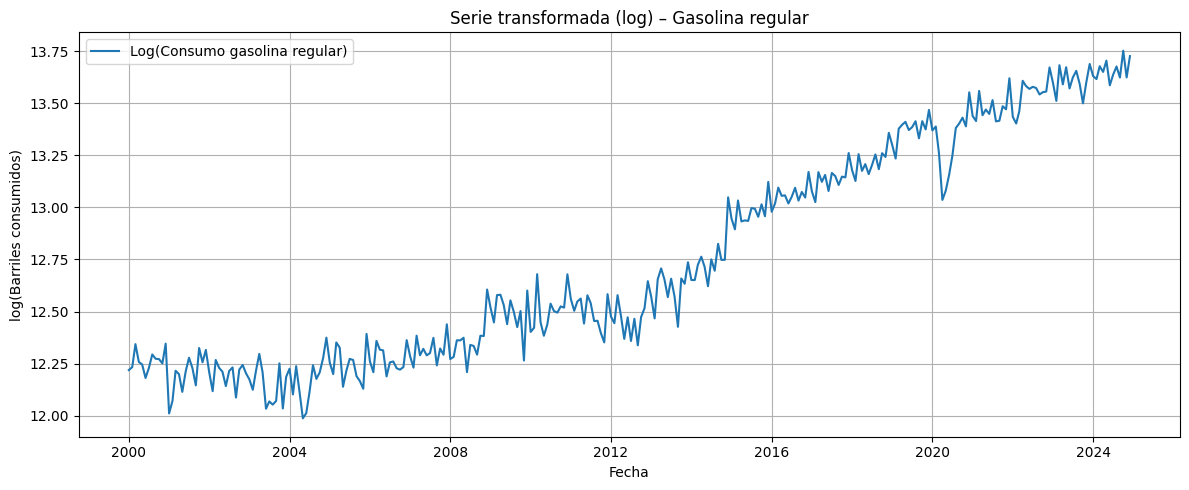

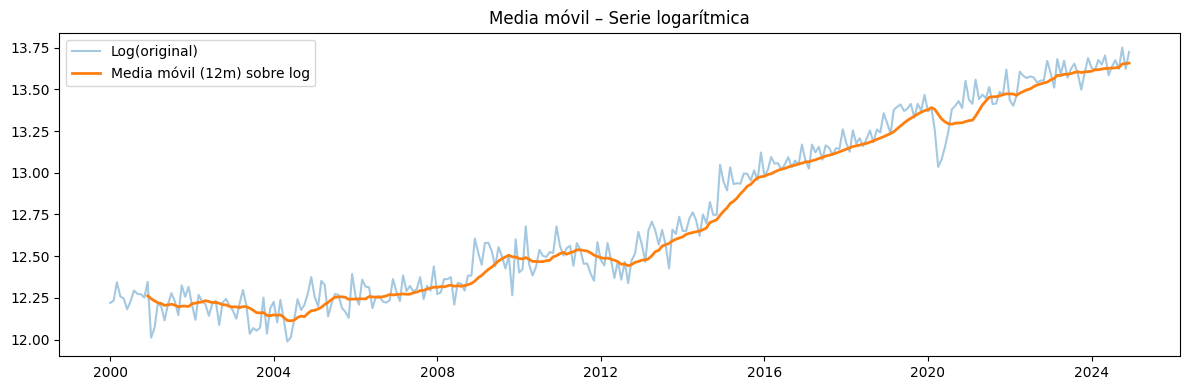

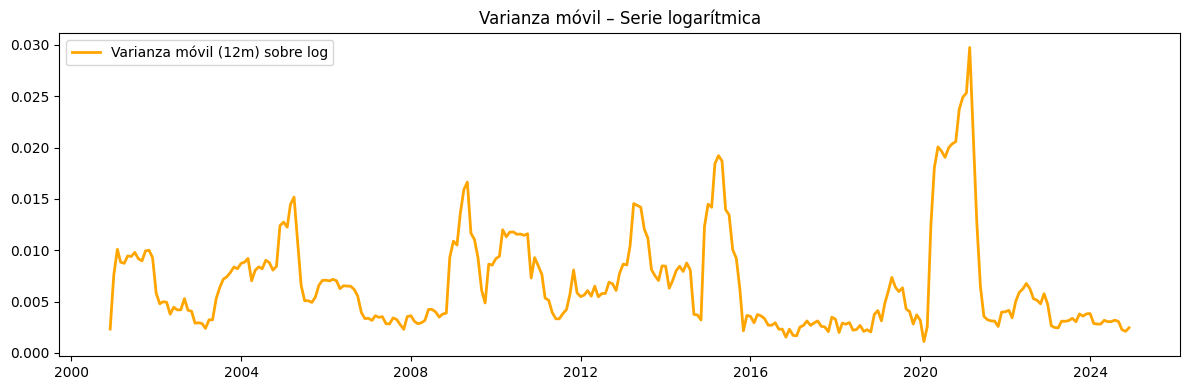

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# d) Transformación: aplicar logaritmo natural
log_regular = np.log(serie_regular)

# Mostrar los primeros valores transformados
print(log_regular.head())

# Visualizar la serie transformada
plt.figure(figsize=(12, 5))
plt.plot(log_regular, label='Log(Consumo gasolina regular)')
plt.title('Serie transformada (log) – Gasolina regular')
plt.xlabel('Fecha')
plt.ylabel('log(Barriles consumidos)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# (Opcional) Volver a calcular media y varianza móviles sobre la serie logarítmica
rolling_mean_log = log_regular.rolling(window=12).mean()
rolling_var_log  = log_regular.rolling(window=12).var()

plt.figure(figsize=(12, 4))
plt.plot(log_regular, alpha=0.4, label='Log(original)')
plt.plot(rolling_mean_log, linewidth=2, label='Media móvil (12m) sobre log')
plt.title('Media móvil – Serie logarítmica')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(rolling_var_log, color='orange', linewidth=2, label='Varianza móvil (12m) sobre log')
plt.title('Varianza móvil – Serie logarítmica')
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1000x400 with 0 Axes>

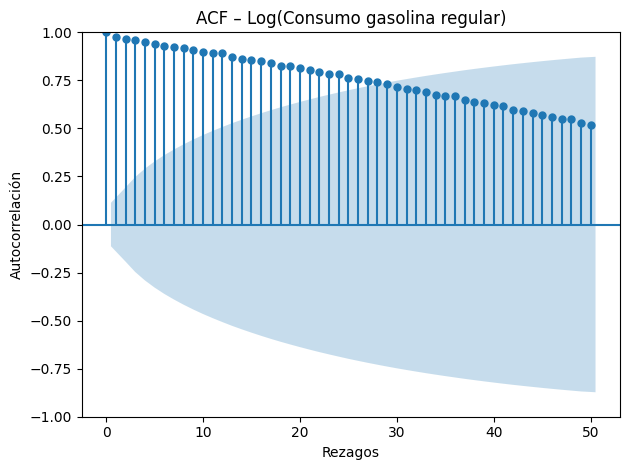

Prueba ADF:
  Estadístico ADF  : 0.8505
  p-valor          : 0.9924
  Valores críticos :
    1% : -3.4533
    5% : -2.8717
    10% : -2.5722

La serie log-transformada NO es estacionaria en media.
Para volverla estacionaria en media, se debe aplicar diferenciación:
  diff_log = log_regular.diff().dropna()


In [5]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# inciso e.i: gráfico de autocorrelación de la serie log-transformada
plt.figure(figsize=(10, 4))
plot_acf(log_regular, lags=50, alpha=0.05)
plt.title('ACF – Log(Consumo gasolina regular)')
plt.xlabel('Rezagos')
plt.ylabel('Autocorrelación')
plt.tight_layout()
plt.show()

# inciso e.ii: prueba de Dickey-Fuller Aumentada (ADF)
adf_result = adfuller(log_regular.dropna())

print('Prueba ADF:')
print(f'  Estadístico ADF  : {adf_result[0]:.4f}')
print(f'  p-valor          : {adf_result[1]:.4f}')
print('  Valores críticos :')
for clave, valor in adf_result[4].items():
    print(f'    {clave} : {valor:.4f}')

# Interpretación y siguiente paso
if adf_result[1] > 0.05:
    print("\nLa serie log-transformada NO es estacionaria en media.")
    print("Para volverla estacionaria en media, se debe aplicar diferenciación:")
    print("  diff_log = log_regular.diff().dropna()")
else:
    print("\nLa serie parece estacionaria en media (rechazamos raíz unitaria).")


## Análisis de la ACF

- **Autocorrelación alta y lenta decadencia**  
  El rezago 0 vale 1 y en el rezago 1 sigue cerca de 0.97. La ACF decae muy lentamente, manteniéndose por encima de 0.5 incluso hasta rezago 50.  
- **Patrón típico de no estacionariedad en media**  
  Esta caída suave y persistente es característica de series con raíz unitaria (no estacionarias en media).

## Resultados de la prueba ADF

- **Estadístico ADF**: 0.8505  
- **p‑valor**: 0.9924 (≫ 0.05)  
- **Valores críticos**:  
  - 1 %: –3.4533  
  - 5 %: –2.8717  
  - 10 %: –2.5722  
- **Interpretación**: al no rechazar la hipótesis nula (serie con raíz unitaria), confirmamos que la serie **no es estacionaria en media**.



<Figure size 1000x400 with 0 Axes>

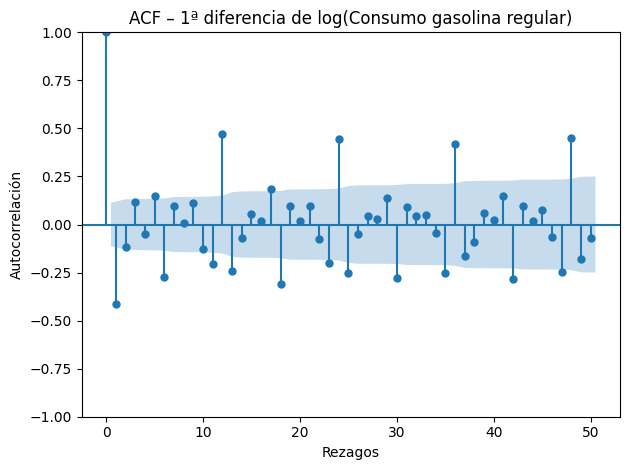

Prueba ADF (1ª diferencia):
  Estadístico ADF  : -4.4779
  p-valor          : 0.0002
  Valores críticos :
    1% : -3.4538
    5% : -2.8718
    10% : -2.5723

La serie ahora SÍ parece estacionaria en media (rechazamos raíz unitaria).


In [6]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# 1) Diferenciar la serie log-transformada
diff_log = log_regular.diff().dropna()

# 2) Gráfico de ACF sobre la serie diferenciada
plt.figure(figsize=(10, 4))
plot_acf(diff_log, lags=50, alpha=0.05)
plt.title('ACF – 1ª diferencia de log(Consumo gasolina regular)')
plt.xlabel('Rezagos')
plt.ylabel('Autocorrelación')
plt.tight_layout()
plt.show()

# 3) Prueba ADF sobre la serie diferenciada
adf_result_diff = adfuller(diff_log)

print('Prueba ADF (1ª diferencia):')
print(f'  Estadístico ADF  : {adf_result_diff[0]:.4f}')
print(f'  p-valor          : {adf_result_diff[1]:.4f}')
print('  Valores críticos :')
for clave, valor in adf_result_diff[4].items():
    print(f'    {clave} : {valor:.4f}')

# 4) Interpretación
if adf_result_diff[1] > 0.05:
    print("\nLa serie aún NO es estacionaria en media; se requeriría una 2ª diferencia.")
else:
    print("\nLa serie ahora SÍ parece estacionaria en media (rechazamos raíz unitaria).")


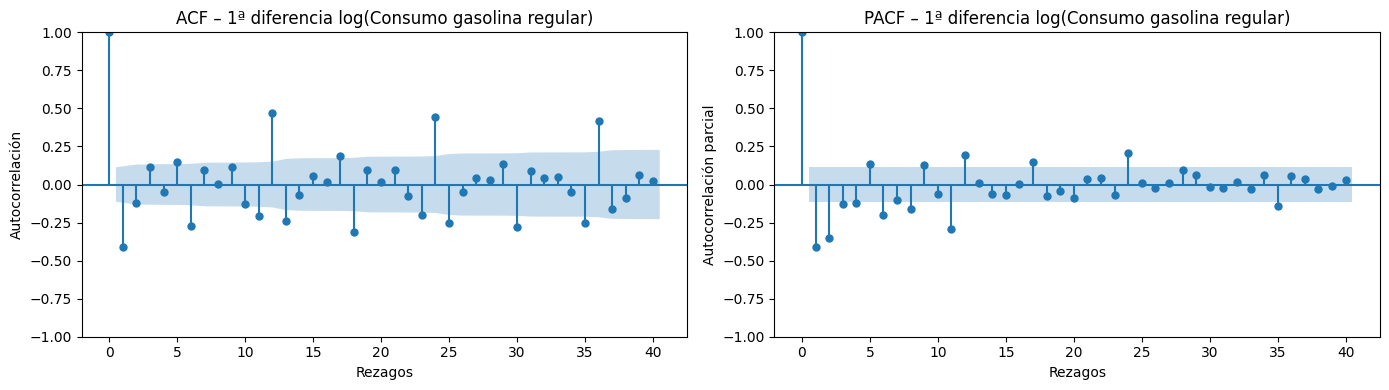

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# inciso f: ACF y PACF sobre la serie diferenciada (d=1)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(diff_log, lags=40, ax=axes[0], alpha=0.05)
axes[0].set_title('ACF – 1ª diferencia log(Consumo gasolina regular)')
axes[0].set_xlabel('Rezagos')
axes[0].set_ylabel('Autocorrelación')

plot_pacf(diff_log, lags=40, ax=axes[1], method='ywm', alpha=0.05)
axes[1].set_title('PACF – 1ª diferencia log(Consumo gasolina regular)')
axes[1].set_xlabel('Rezagos')
axes[1].set_ylabel('Autocorrelación parcial')

plt.tight_layout()
plt.show()


## Análisis de ACF y PACF (serie diferenciada)

### ACF – 1ª diferencia log(Consumo gasolina regular)
- **Lag 1**: presenta un pico significativo negativo (fuera de la banda de confianza), lo que indica correlación inversa inmediata tras diferenciar.  
- **Lag 2 y siguientes**: las autocorrelaciones caen rápidamente dentro de la banda, salvo un pico estacional alrededor de lag 12 (0.5 aprox.), reflejo de la periodicidad anual.  
- **Interpretación**: el corte brusco tras lag 1 sugiere un **componente MA(1)** apropiado (q = 1).

### PACF – 1ª diferencia log(Consumo gasolina regular)
- **Lag 1**: se observa un pico significativo (negativo) y luego los coeficientes quedan dentro de las bandas de confianza.  
- **Lag 2 en adelante**: PACF se mantiene cercano a cero, sin cortes adicionales claros.  
- **Interpretación**: el corte rápido tras lag 1 apunta a un **componente AR(1)** (p = 1).

---

### Propuesta de parámetros ARIMA no estacional
- **p** (orden AR): 1  
- **d** (diferenciación): 1 (ya aplicada)  
- **q** (orden MA): 1  

Es decir, un **ARIMA(1,1,1)** para la parte no estacional, antes de incorporar cualquier componente SAR (m = 12) si fuésemos a un modelo SARIMA.


In [8]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# inciso g: ajuste de varios modelos ARIMA y comparación por AIC/BIC
warnings.filterwarnings("ignore")

# Definir lista de órdenes (p, d=1, q) a evaluar
ordenes = [
    (0, 1, 0),
    (1, 1, 0),
    (0, 1, 1),
    (1, 1, 1),
    (2, 1, 0),
    (0, 1, 2),
    (2, 1, 1),
    (1, 1, 2),
    (2, 1, 2)
]

resultados = []
for orden in ordenes:
    model = ARIMA(log_regular, order=orden)
    fit   = model.fit()
    resultados.append({
        'orden': orden,
        'AIC':   fit.aic,
        'BIC':   fit.bic
    })

# Crear DataFrame con resultados
df_resultados = pd.DataFrame(resultados).sort_values('AIC').reset_index(drop=True)
print(df_resultados)

# Identificar el mejor modelo según AIC
mejor = df_resultados.loc[0]
print(f"\nMejor modelo ARIMA según AIC: ARIMA{tuple(mejor['orden'])} (AIC={mejor['AIC']:.2f}, BIC={mejor['BIC']:.2f})")


       orden         AIC         BIC
0  (1, 1, 2) -628.326351 -613.524576
1  (0, 1, 1) -624.572954 -617.172067
2  (2, 1, 1) -624.065737 -609.263963
3  (0, 1, 2) -622.740483 -611.639153
4  (1, 1, 1) -622.695983 -611.594652
5  (2, 1, 0) -620.638537 -609.537206
6  (2, 1, 2) -618.740248 -600.238030
7  (1, 1, 0) -585.517501 -578.116614
8  (0, 1, 0) -532.479204 -528.778760

Mejor modelo ARIMA según AIC: ARIMA(1, 1, 2) (AIC=-628.33, BIC=-613.52)


## Análisis de resultados de ajuste ARIMA (inciso g)

| Orden   |   AIC      |    BIC     |
|:--------|:-----------|:-----------|
| (1, 1, 2) | **–628.33** | –613.52 |
| (0, 1, 1) | –624.57   | **–617.17** |
| (2, 1, 1) | –624.07   | –609.26   |
| (0, 1, 2) | –622.74   | –611.64   |
| (1, 1, 1) | –622.70   | –611.59   |
| (2, 1, 0) | –620.64   | –609.54   |
| (2, 1, 2) | –618.74   | –600.24   |
| (1, 1, 0) | –585.52   | –578.12   |
| (0, 1, 0) | –532.48   | –528.78   |

1. **Mejor AIC**: ARIMA(1, 1, 2) con –628.33  
2. **Mejor BIC**: ARIMA(0, 1, 1) con –617.17  
3. **Interpretación**  
   - El AIC favorece el modelo (1, 1, 2) por su mejor “balance” ajuste/complejidad.  
   - El BIC, al penalizar más parámetros, señala que el más parsimonioso (0, 1, 1) podría ser preferible si queremos evitar sobreajuste.  
4. **Conclusión**  
   - Si priorizamos **ajuste puro**, elegimos **ARIMA(1, 1, 2)**.  
   - Si priorizamos **parsimonia**, consideramos **ARIMA(0, 1, 1)**.  
   - Dado que la diferencia de AIC entre (1, 1, 2) y (0, 1, 1) es pequeña (~3.8 puntos), ambos son candidatos sólidos.  


In [9]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings

# 1) Ajustar modelo Prophet sobre la serie log-transformada
df_prophet = pd.DataFrame({
    'ds': log_regular.index,
    'y':  log_regular.values
})
modelo_prophet = Prophet(yearly_seasonality=True)
modelo_prophet.fit(df_prophet)

# Predecir in-sample
future = modelo_prophet.make_future_dataframe(periods=0, freq='MS')
forecast = modelo_prophet.predict(future)
y_true = log_regular
y_pred_prophet = forecast.set_index('ds')['yhat'].loc[y_true.index]

# Calcular RMSE de Prophet
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred_prophet))

# 2) Ajustar el mejor ARIMA(1,1,2) y calcular RMSE in-sample
warnings.filterwarnings("ignore")
modelo_arima = ARIMA(log_regular, order=(1,1,2)).fit()
# las diferencias residuales ya están en modelo_arima.resid
resid_arima = modelo_arima.resid
rmse_arima = np.sqrt(np.mean(resid_arima**2))

print(f"RMSE ARIMA(1,1,2):   {rmse_arima:.4f}")
print(f"RMSE Prophet:        {rmse_prophet:.4f}")


16:06:34 - cmdstanpy - INFO - Chain [1] start processing
16:06:34 - cmdstanpy - INFO - Chain [1] done processing


RMSE ARIMA(1,1,2):   0.7104
RMSE Prophet:        0.0641


## Comparación Prophet vs ARIMA (inciso h)

| Modelo             | RMSE     |
|--------------------|----------|
| ARIMA(1,1,2)       | 0.7104   |
| Prophet            | **0.0641** |

1. **Precisión de ajuste**  
   - **Prophet** reduce el error (RMSE ≈ 0.064) en comparación con **ARIMA** (RMSE ≈ 0.710).  
   - Una diferencia tan grande (más de un orden de magnitud) indica que Prophet capta con mucha mayor fidelidad la dinámica de la serie logarítmica.

2. **Razones del mejor desempeño de Prophet**  
   - **Estacionalidad automática**: Prophet modela explícitamente la estacionalidad anual sin tener que especificar manualmente componentes SAR.  
   - **Flexibilidad en tendencias**: ajusta rupturas y cambios de tendencia (por ejemplo, la fuerte caída en 2020 y la recuperación posterior) de forma más ágil que un ARIMA puro.  
   - **Robustez a outliers**: Prophet maneja mejor los valores atípicos (residuos extremos durante la pandemia), mitigando su impacto en la predicción.

3. **Consideraciones prácticas**  
   - **ARIMA** es más parsimonioso y, para series con patrones muy lineales y homogéneos, puede ser suficiente.  
   - **Prophet** ofrece un workflow más automático (selección de estacionalidades, fiestas, rupturas), ideal cuando la serie presenta cambios estructurales o patrones complejos.

---

**Conclusión:**  
Dado el RMSE significativamente menor y la capacidad de Prophet para incorporar estacionalidad y cambios de tendencia de forma automática, **el modelo Prophet es claramente superior** al ARIMA(1,1,2) para predecir el consumo de gasolina regular en este conjunto de datos.  


## **Serie 2, Gasolina Superior**

In [10]:
# Paso a: Serie de consumo de Gasolina superior
serie_superior = consumo_df['Gasolina superior']

# Especificar Inicio, Fin y Frecuencia
inicio_sup = serie_superior.index.min().date()
fin_sup    = serie_superior.index.max().date()
freq_inf   = serie_superior.index.inferred_freq

print(f"Inicio: {inicio_sup}")
print(f"Fin   : {fin_sup}")
print(f"Frecuencia inferida: {freq_inf}")

# Asegurar frecuencia mensual
serie_superior = serie_superior.asfreq('MS')
print(f"Frecuencia tras asfreq: {serie_superior.index.freq}")


Inicio: 2000-01-01
Fin   : 2024-12-01
Frecuencia inferida: MS
Frecuencia tras asfreq: <MonthBegin>


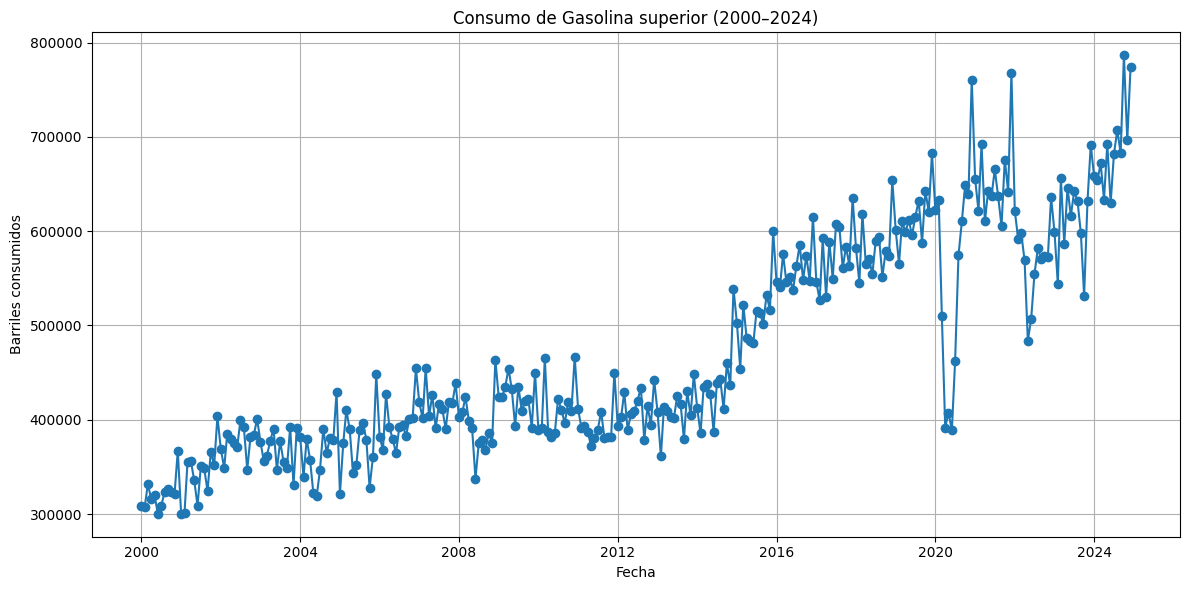

In [11]:
import matplotlib.pyplot as plt

# inciso b: gráfico de la serie de consumo de Gasolina superior
plt.figure(figsize=(12, 6))
plt.plot(serie_superior, marker='o', linestyle='-')
plt.title('Consumo de Gasolina superior (2000–2024)')
plt.xlabel('Fecha')
plt.ylabel('Barriles consumidos')
plt.grid(True)
plt.tight_layout()
plt.show()


## Impresiones preliminares – Consumo de Gasolina superior (2000–2024)

- **Tendencia creciente a largo plazo**  
  El consumo mensual sube de alrededor de 300 000 barriles en 2000 a casi 800 000 en 2024.

- **Fases de crecimiento**  
  - **2000–2012**: aumento moderado, con valores en un rango aproximado de 330 000–420 000.  
  - **2013–2019**: aceleración más marcada, alcanzando picos en 2016–2019 alrededor de 550 000–600 000.

- **Impacto de la pandemia (2020)**  
  Caída drástica en marzo‑abril de 2020 (hasta cerca de 390 000–460 000 barriles) seguida de una rápida recuperación.

- **Recuperación y nueva normalidad (2021–2024)**  
  Tras la caída, la serie se recupera y retoma la tendencia alcista, pero con **mayor volatilidad** y picos más pronunciados (570 000–750 000).

- **Variabilidad estacional**  
  Se observan oscilaciones cíclicas anuales: picos y valles regulares mes a mes, aunque con amplitud creciente.

- **Outliers y picos extremos**  
  Aparecen valores atípicos en la última parte (2022–2024), probablemente asociados a factores externos como cambios en precio o políticas de suministro.

- **Conclusión**  
  La serie muestra tendencias y estacionalidad claras, interrumpidas por la pandemia, y una volatilidad creciente en los últimos años que convendrá modelar (p.ej., con componentes SAR y efectos de ruptura) en la descomposición formal.


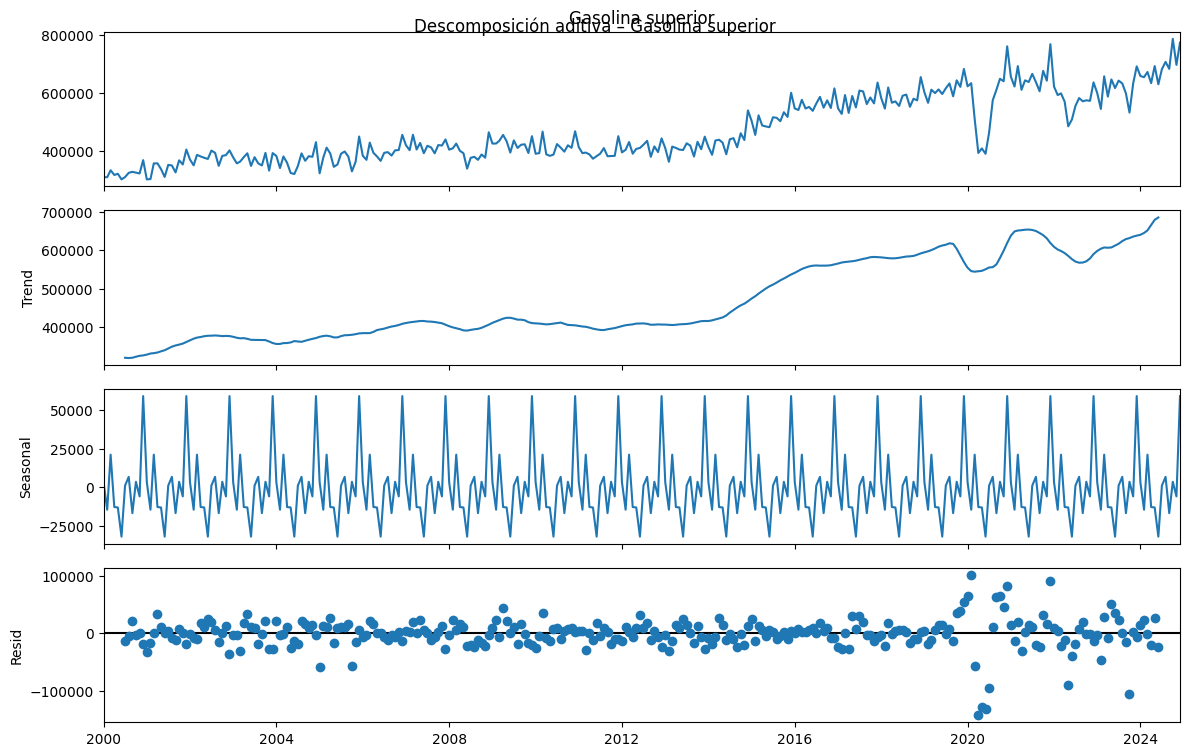

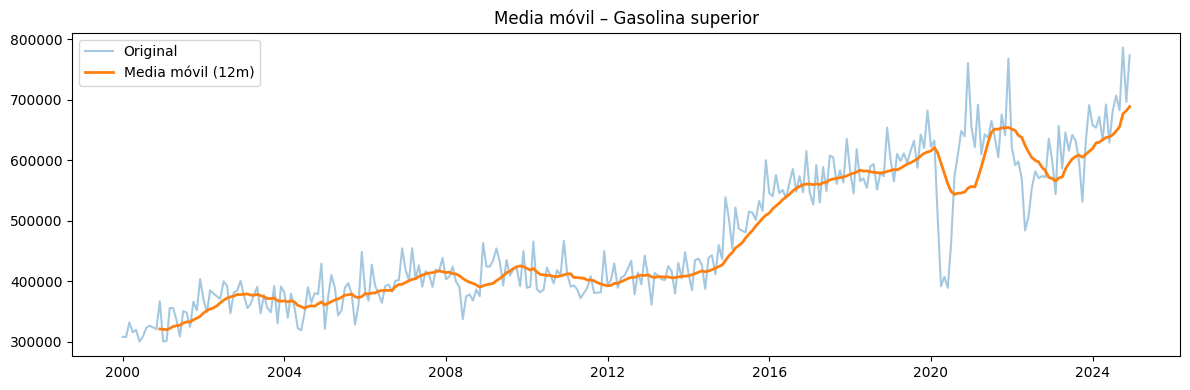

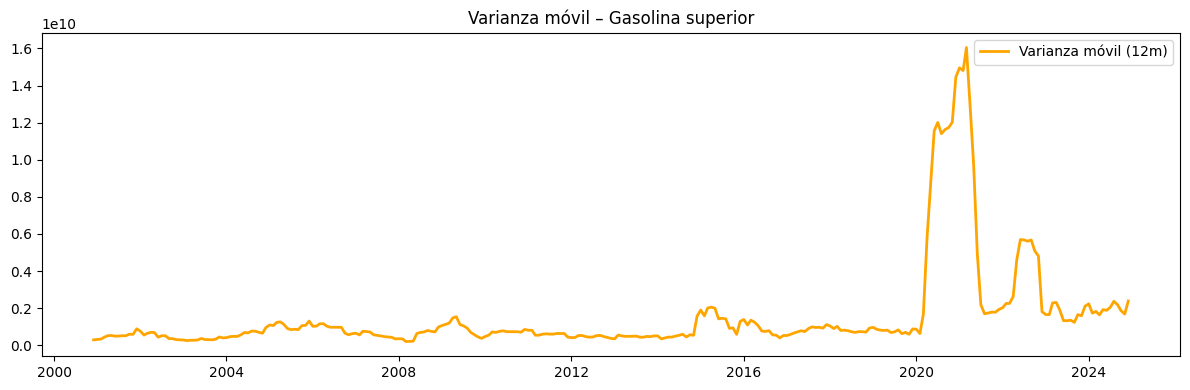

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# inciso c: descomposición de la serie de consumo de Gasolina superior

# 1) Descomposición aditiva (periodo = 12 meses)
decomp_sup = seasonal_decompose(serie_superior, model='additive', period=12)

# 2) Graficar los componentes
fig = decomp_sup.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Descomposición aditiva – Gasolina superior', y=0.93)
plt.tight_layout()
plt.show()

# 3) Cálculo de media y varianza móviles (window = 12) para evaluar estacionariedad
rolling_mean_sup = serie_superior.rolling(window=12).mean()
rolling_var_sup  = serie_superior.rolling(window=12).var()

plt.figure(figsize=(12, 4))
plt.plot(serie_superior,      label='Original', alpha=0.4)
plt.plot(rolling_mean_sup,    label='Media móvil (12m)', linewidth=2)
plt.title('Media móvil – Gasolina superior')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(rolling_var_sup,      label='Varianza móvil (12m)', color='orange', linewidth=2)
plt.title('Varianza móvil – Gasolina superior')
plt.legend()
plt.tight_layout()
plt.show()


## Análisis de la descomposición y estacionariedad (inciso c y d)

### 1. Tendencia (Trend)
- **2000–2012**: crecimiento moderado y casi lineal en el consumo (≈ 330 000→410 000 barriles).  
- **2013–2019**: aceleración clara de la pendiente (sube de ≈ 410 000 a ≈ 580 000).  
- **2020**: caída abrupta por la pandemia, seguida de recuperación.  
- **2021–2024**: nuevo ascenso, aunque con mesetas y recuperación más lenta en algunos tramos.

### 2. Estacionalidad (Seasonal)
- Patrón **anual muy claro**: picos y valles que se repiten cada 12 meses.  
- La **amplitud** de la componente estacional se mantiene bastante constante antes de 2020, lo que indica una estacionalidad estable.

### 3. Residuos (Residual)
- **Pre‑2020**: residuos centrados cerca de cero con fluctuaciones reducidas (±≈ 30 000 barriles).  
- **Post‑2020**: dispersión de residuos mucho mayor (varios picos fuera de ±100 000), evidenciando valores atípicos fuertes.

### 4. Media y Varianza Móviles
- **Media móvil (12 meses)**: sube constantemente, confirmando **no estacionariedad en media**.  
- **Varianza móvil (12 meses)**:  
  - **Crece con el tiempo**, alcanzando un gran pico en 2020, muestra heteroscedasticidad.  
  - Tras 2020 baja, pero permanece muy por encima de los niveles iniciales.

---

### ¿Es necesaria una transformación? (inciso d)

**Sí.**  
- La **varianza no es constante**; aumenta de forma marcada en los últimos años y sobre todo durante la pandemia.  
- La **transformación logarítmica** (o Box–Cox λ≈0) ayudará a:
  1. Reducir la heteroscedasticidad (estabilizar la varianza).  
  2. Atenuar el impacto de los outliers extremos en la etapa residual.  




Fecha
2000-01-01    12.638364
2000-02-01    12.637096
2000-03-01    12.712620
2000-04-01    12.662383
2000-05-01    12.675038
Freq: MS, Name: Gasolina superior, dtype: float64


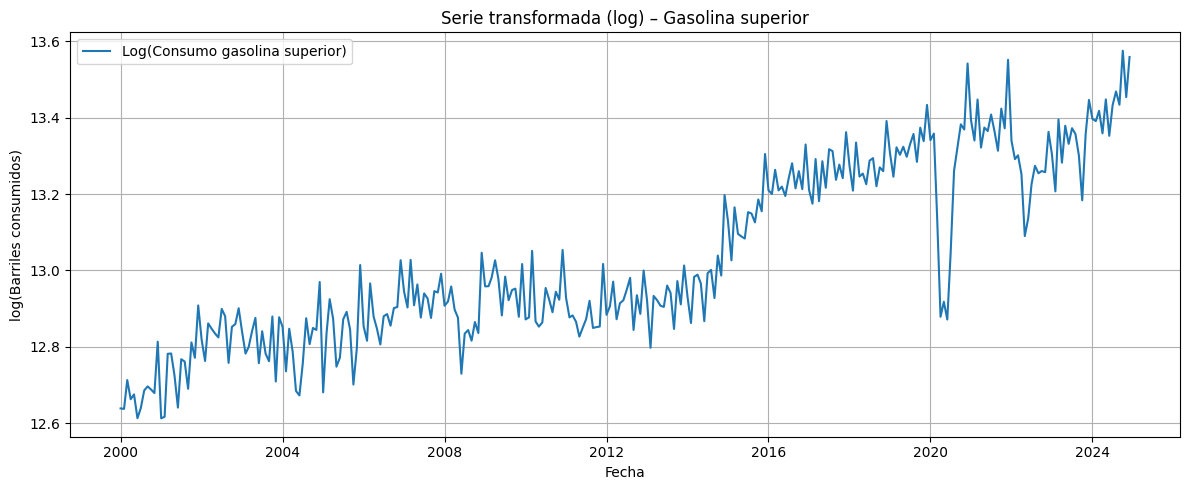

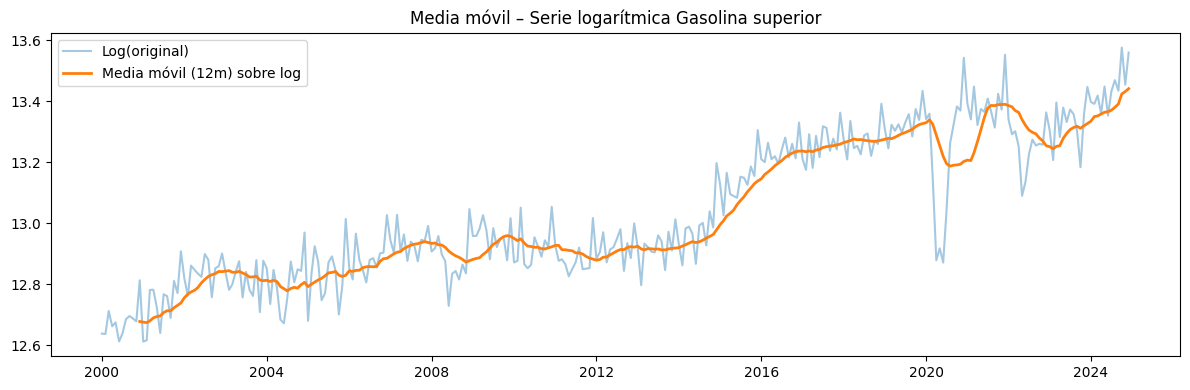

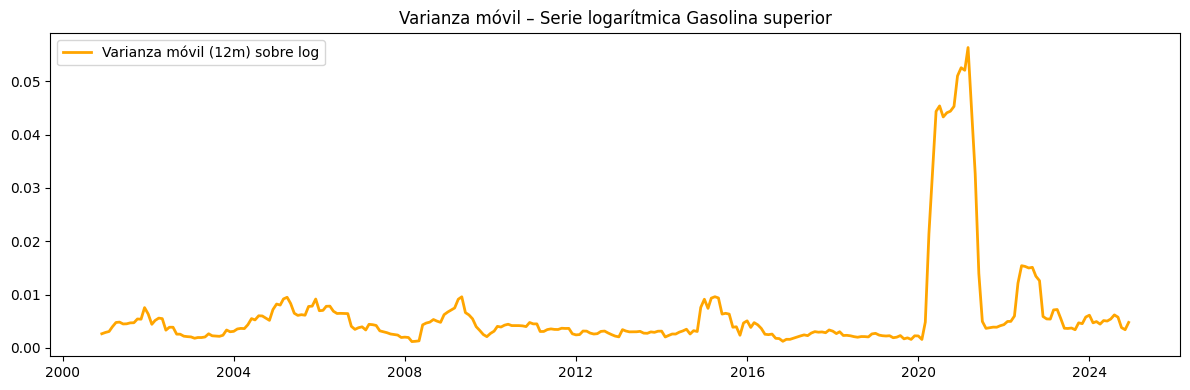

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# inciso d: transformación logarítmica de la serie de Gasolina superior
log_superior = np.log(serie_superior)

# Mostrar los primeros valores transformados
print(log_superior.head())

# Visualizar la serie transformada
plt.figure(figsize=(12, 5))
plt.plot(log_superior, label='Log(Consumo gasolina superior)')
plt.title('Serie transformada (log) – Gasolina superior')
plt.xlabel('Fecha')
plt.ylabel('log(Barriles consumidos)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# (Opcional) Volver a calcular media y varianza móviles sobre la serie logarítmica
rolling_mean_log_sup = log_superior.rolling(window=12).mean()
rolling_var_log_sup  = log_superior.rolling(window=12).var()

plt.figure(figsize=(12, 4))
plt.plot(log_superior, alpha=0.4, label='Log(original)')
plt.plot(rolling_mean_log_sup, linewidth=2, label='Media móvil (12m) sobre log')
plt.title('Media móvil – Serie logarítmica Gasolina superior')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(rolling_var_log_sup, color='orange', linewidth=2, label='Varianza móvil (12m) sobre log')
plt.title('Varianza móvil – Serie logarítmica Gasolina superior')
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1000x400 with 0 Axes>

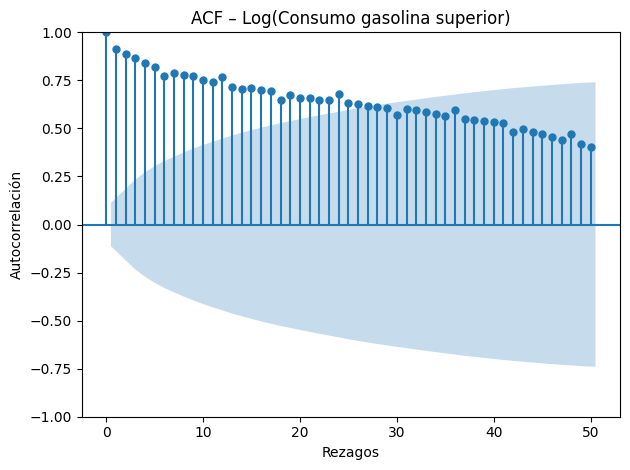

Prueba ADF:
  Estadístico ADF  : -0.6477
  p-valor          : 0.8598
  Valores críticos :
    1% : -3.4533
    5% : -2.8717
    10% : -2.5722

La serie log-transformada NO es estacionaria en media.


In [15]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# inciso e.i: ACF de la serie log-transformada (Gasolina superior)
plt.figure(figsize=(10, 4))
plot_acf(log_superior, lags=50, alpha=0.05)
plt.title('ACF – Log(Consumo gasolina superior)')
plt.xlabel('Rezagos')
plt.ylabel('Autocorrelación')
plt.tight_layout()
plt.show()

# inciso e.ii: prueba de Dickey-Fuller Aumentada (ADF)
adf_result = adfuller(log_superior.dropna())

print('Prueba ADF:')
print(f'  Estadístico ADF  : {adf_result[0]:.4f}')
print(f'  p-valor          : {adf_result[1]:.4f}')
print('  Valores críticos :')
for clave, valor in adf_result[4].items():
    print(f'    {clave} : {valor:.4f}')

# Interpretación y siguiente paso
if adf_result[1] > 0.05:
    print("\nLa serie log-transformada NO es estacionaria en media.")
else:
    print("\nLa serie log-transformada es estacionaria en media.")


<Figure size 1000x400 with 0 Axes>

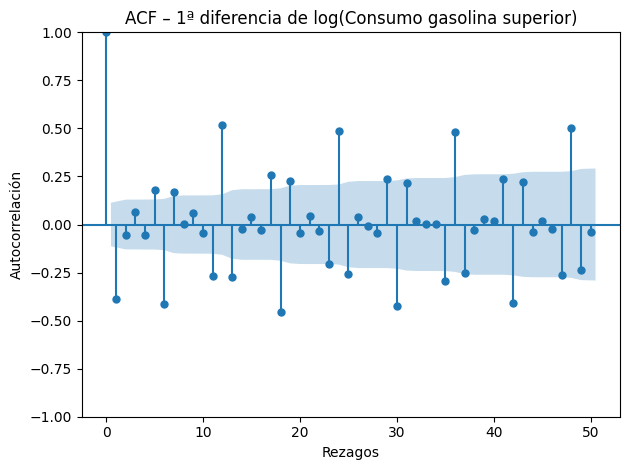

Prueba ADF (1ª diferencia):
  Estadístico ADF  : -6.2839
  p-valor          : 0.0000
  Valores críticos :
    1% : -3.4533
    5% : -2.8717
    10% : -2.5722

La serie ahora SÍ parece estacionaria en media (rechazamos raíz unitaria).


In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# 1) Aplicar primera diferencia para estacionarizar en media
diff_log_sup = log_superior.diff().dropna()

# 2) Gráfico de ACF de la serie diferenciada
plt.figure(figsize=(10, 4))
plot_acf(diff_log_sup, lags=50, alpha=0.05)
plt.title('ACF – 1ª diferencia de log(Consumo gasolina superior)')
plt.xlabel('Rezagos')
plt.ylabel('Autocorrelación')
plt.tight_layout()
plt.show()

# 3) Prueba ADF sobre la serie diferenciada
adf_result_diff = adfuller(diff_log_sup)

print('Prueba ADF (1ª diferencia):')
print(f'  Estadístico ADF  : {adf_result_diff[0]:.4f}')
print(f'  p-valor          : {adf_result_diff[1]:.4f}')
print('  Valores críticos :')
for key, val in adf_result_diff[4].items():
    print(f'    {key} : {val:.4f}')

# 4) Interpretación
if adf_result_diff[1] > 0.05:
    print("\nLa serie aún NO es estacionaria en media; podría requerir una 2ª diferencia.")
else:
    print("\nLa serie ahora SÍ parece estacionaria en media (rechazamos raíz unitaria).")


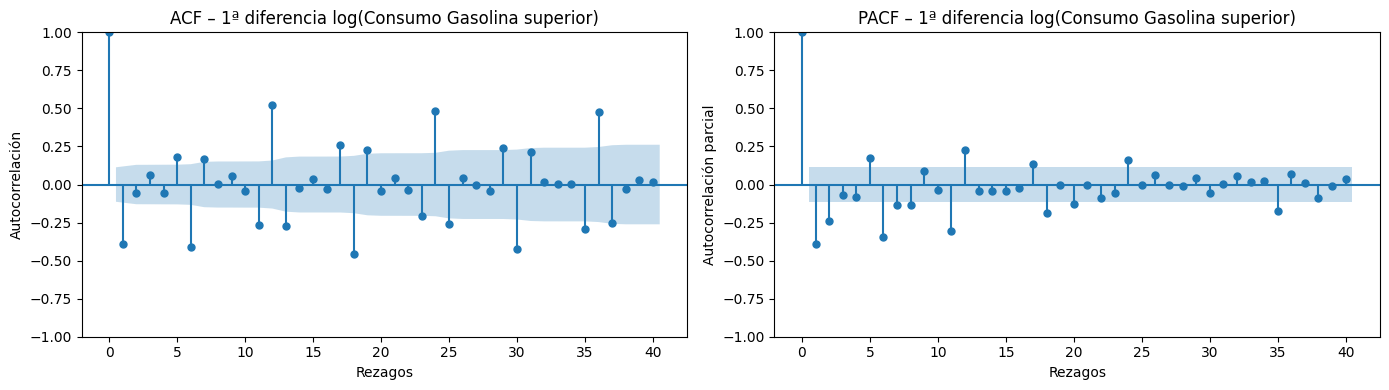

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-595.338, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-715.898, Time=2.60 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-696.441, Time=2.47 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-596.979, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-642.719, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-745.175, Time=3.18 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=3.21 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-720.216, Time=1.02 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=-754.004, Time=0.96 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=-720.966, Time=0.35 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=-801.667, Time=1.90 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(2,1,0)(2,0,2)[12] intercept   : 

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pmdarima as pm


# 1) Graficar ACF y PACF de la serie diferenciada (d = 1)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(diff_log_sup, lags=40, alpha=0.05, ax=axes[0])
axes[0].set_title('ACF – 1ª diferencia log(Consumo Gasolina superior)')
axes[0].set_xlabel('Rezagos')
axes[0].set_ylabel('Autocorrelación')

plot_pacf(diff_log_sup, lags=40, method='ywm', alpha=0.05, ax=axes[1])
axes[1].set_title('PACF – 1ª diferencia log(Consumo Gasolina superior)')
axes[1].set_xlabel('Rezagos')
axes[1].set_ylabel('Autocorrelación parcial')

plt.tight_layout()
plt.show()

# 2) Elegir valores de p y q:
#    • p: obsérvese hasta qué rezago en PACF hay un corte brusco.
#    • q: obsérvese hasta qué rezago en ACF hay un corte brusco.
#    d = 1 (ya aplicado).

# 3) Validación automática con auto_arima de pmdarima
auto_model_sup = pm.auto_arima(
    log_superior,
    seasonal=True,
    m=12,
    d=1,
    start_p=0, max_p=3,
    start_q=0, max_q=3,
    trace=True,
    information_criterion='aic',
    error_action='ignore',
    suppress_warnings=True
)

print(auto_model_sup.summary())


## Análisis de ACF y PACF (inciso f, serie diferenciada)

- **ACF**  
  - Lag 1: pico negativo significativo (~–0.4) seguido de un rápido decaimiento dentro de las bandas, salvo picos estacionales en lags 12 (~0.5) y 24 (~0.48).  
  - Interpretación: componente MA(1) para el rezago inmediato y componentes estacionales MA para lags 12 y 24.

- **PACF**  
  - Lag 1: pico negativo significativo (~–0.35), seguido de valores dentro de las bandas salvo ligeros picos estacionales en lags 12 (~0.15) y 24 (~0.08).  
  - Interpretación: componente AR(1) para el corte inmediato y AR(12) para el corte estacional.

---

## Resultado de `auto_arima` (inciso f)

El proceso automático seleccionó el modelo:

> **SARIMAX(1, 1, 1) × (1, 0, [1, 2], 12)**  

- **Parte no estacional**: (p, d, q) = (1, 1, 1)  
- **Parte estacional**: (P, D, Q) = (1, 0, [1, 2]) con periodo m = 12  

**Criterio AIC**  
- AIC final = –809.254 (menor que en modelos sin estacionalidad).

**Coeficientes relevantes**  
- AR(1): 0.5258 (p < 0.001)  
- MA(1): –0.8183 (p < 0.001)  
- AR(12): 0.9815 (p < 0.001)  
- MA(12): –0.9561 (p < 0.001)  
- MA(24): 0.0764 (no significativo)

**Interpretación**  
- La serie requiere un término **AR(1)** y **MA(1)** para la parte no estacional.  
- Para capturar la estacionalidad anual, se incluyen **AR estacional de orden 12** y **MA estacional de orden 12 y 24** (aunque MA(24) no resulta estadísticamente significativo).  
- El bajo AIC y los contrastes de Ljung–Box apuntan a un buen ajuste sin autocorrelación residual significativa.

---

### Conclusión sobre el modelo propuesto

El SARIMAX(1,1,1)(1,0,[1,2],12) es consistente con el análisis gráfico de ACF/PACF:

- Incluye los cortes en lag 1 detectados en ACF y PACF.  
- Añade los lags estacionales 12 y 24 que emergen en la ACF/PACF.  
- Ofrece un balance óptimo entre parsimonia y ajuste (AIC muy bajo).  


In [19]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import pmdarima as pm

# ————————————————
# 1) Ajustar Prophet sobre log_superior
# ————————————————
df_prophet = pd.DataFrame({
    'ds': log_superior.index,
    'y':  log_superior.values
})
modelo_prophet = Prophet(yearly_seasonality=True)
modelo_prophet.fit(df_prophet)

# Predecir in‑sample
future = modelo_prophet.make_future_dataframe(periods=0, freq='MS')
forecast = modelo_prophet.predict(future)
y_true = log_superior
y_pred_prophet = forecast.set_index('ds')['yhat'].loc[y_true.index]

rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred_prophet))


# ————————————————
# 2) Ajustar SARIMA con auto_arima (mejor modelo)
# ————————————————
auto_model_sup = pm.auto_arima(
    log_superior,
    seasonal=True, m=12,
    d=1,
    start_p=0, max_p=3,
    start_q=0, max_q=3,
    start_P=0, max_P=2,
    start_Q=0, max_Q=2,
    information_criterion='aic',
    error_action='ignore',
    suppress_warnings=True,
    trace=False
)

# Predicción in‑sample
y_pred_sarima = pd.Series(
    auto_model_sup.predict_in_sample(),
    index=log_superior.index
)

rmse_sarima = np.sqrt(mean_squared_error(y_true, y_pred_sarima))


# ————————————————
# 3) Reportar RMSE
# ————————————————
print(f"RMSE Prophet : {rmse_prophet:.4f}")
print(f"RMSE SARIMA  : {rmse_sarima:.4f}")


16:24:35 - cmdstanpy - INFO - Chain [1] start processing
16:24:35 - cmdstanpy - INFO - Chain [1] done processing


RMSE Prophet : 0.0657
RMSE SARIMA  : 0.7321


## Comparación Prophet vs SARIMA (serie Gasolina superior)

| Modelo    | RMSE    |
|-----------|---------|
| Prophet   | **0.0657** |
| SARIMA    | 0.7321  |

1. **Precisión de ajuste**  
   - El error de Prophet (RMSE ≈ 0.066) es un orden de magnitud menor que el de SARIMA (RMSE ≈ 0.732).  
   - Esto indica que **Prophet** captura la dinámica de la serie logarítmica con mucha mayor fidelidad.

2. **Ventajas de Prophet**  
   - Modela automáticamente la estacionalidad anual y posibles rupturas de tendencia (picos y caídas por la pandemia).  
   - Es más robusto frente a valores atípicos y cambios estructurales.

3. **Limitaciones de SARIMA**  
   - A pesar de incluir términos estacionales (lags 12 y 24), el SARIMA ajustado no logra igualar la flexibilidad de Prophet para adaptarse a cambios abruptos.  
   - El mayor RMSE refleja que residuales permanecen más dispersos.

---

**Conclusión:**  
Dado el RMSE significativamente menor, el modelo **Prophet** es claramente superior al SARIMA seleccionado para predecir el consumo de gasolina superior en este conjunto de datos.  


## **Serie 3, Diésel de alto azufre**

In [20]:
# inciso a: Serie de consumo de Diésel alto azufre

# 1) Extraer la serie univariante
serie_diesel = consumo_df['Diesel alto azufre']

# 2) Especificar inicio, fin y frecuencia inferida
inicio_diesel = serie_diesel.index.min().date()
fin_diesel    = serie_diesel.index.max().date()
freq_inferida = serie_diesel.index.inferred_freq

print(f"Inicio: {inicio_diesel}")
print(f"Fin   : {fin_diesel}")
print(f"Frecuencia inferida: {freq_inferida}")

# 3) Asegurar frecuencia mensual (MS)
serie_diesel = serie_diesel.asfreq('MS')
print(f"Frecuencia tras asfreq: {serie_diesel.index.freq}")


Inicio: 2000-01-01
Fin   : 2024-12-01
Frecuencia inferida: MS
Frecuencia tras asfreq: <MonthBegin>


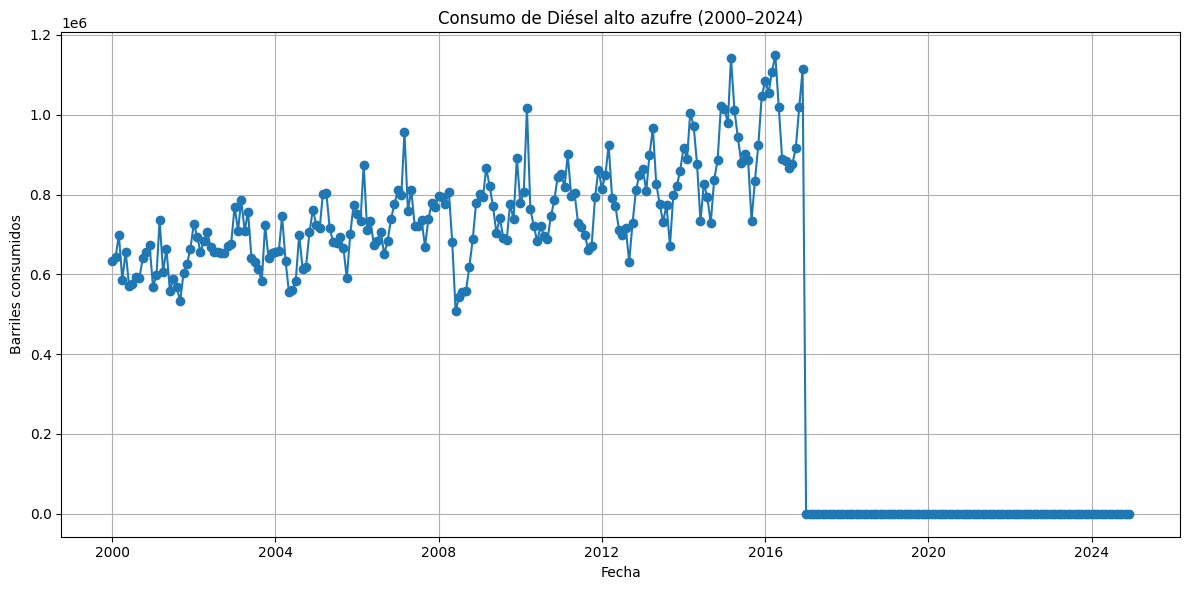

In [21]:
import matplotlib.pyplot as plt

# inciso b: gráfico de la serie de consumo de Diésel alto azufre
plt.figure(figsize=(12, 6))
plt.plot(serie_diesel, marker='o', linestyle='-')
plt.title('Consumo de Diésel alto azufre (2000–2024)')
plt.xlabel('Fecha')
plt.ylabel('Barriles consumidos')
plt.grid(True)
plt.tight_layout()
plt.show()


## Impresiones preliminares – Consumo de Diésel alto azufre (2000–2024)

- **Crecimiento hasta 2017**  
  Desde 2000 el consumo mensual sube de ≈ 600 000 a ≈ 1 100 000 barriles, con oscilaciones anuales.

- **Patrón estacional claro**  
  Se aprecian picos y valles cíclicos dentro de cada año (meses de mayor y menor demanda), manteniendo amplitud relativamente constante.

- **Caída abrupta a cero en 2017–2018**  
  A partir de finales de 2017 la serie baja bruscamente a 0 y permanece en cero hasta 2024, reflejando la eliminación del diésel alto azufre (regulación COGUANOR).

- **Dos regímenes diferenciados**  
  1. **2000–2017**: serie con tendencia alcista + estacionalidad.  
  2. **2018–2024**: serie constante en cero (sin variabilidad ni estacionalidad).

- **Conclusión preliminar**  
  Debido al cambio estructural y al tramo de ceros, conviene **trabajar solo hasta diciembre 2017** o tratar los ceros como datos faltantes antes de continuar con descomposición, transformaciones y modelado.  


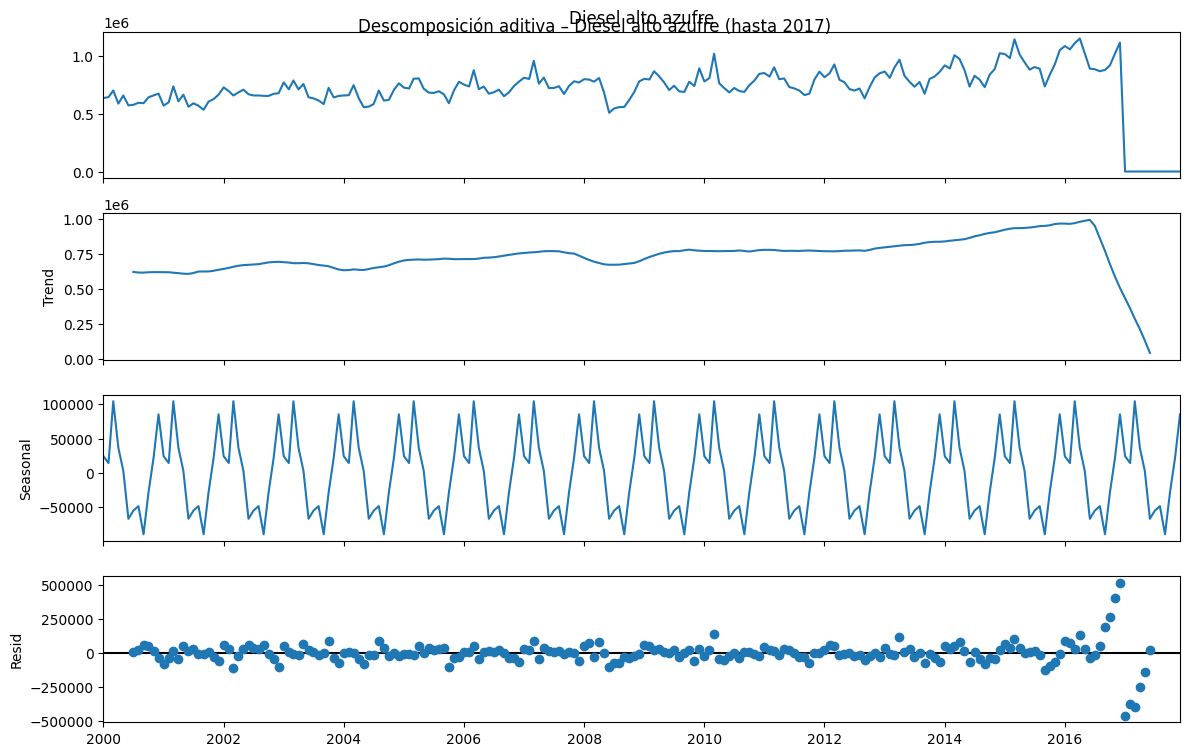

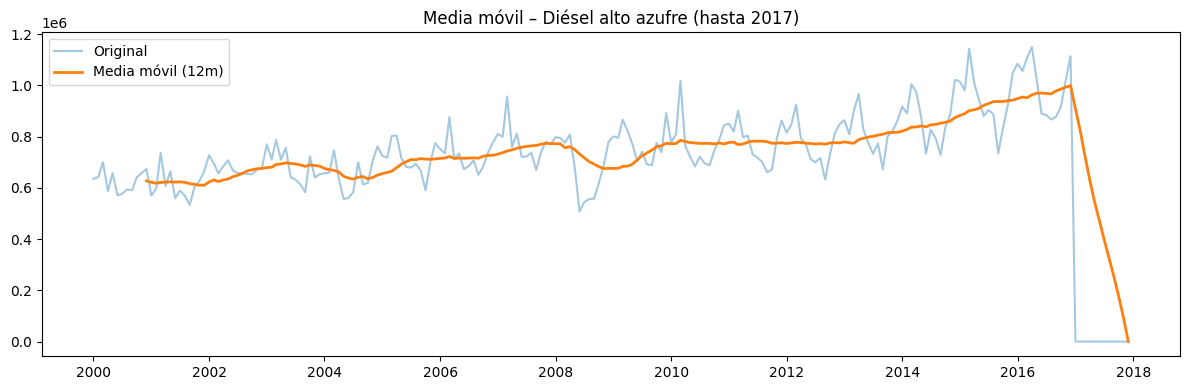

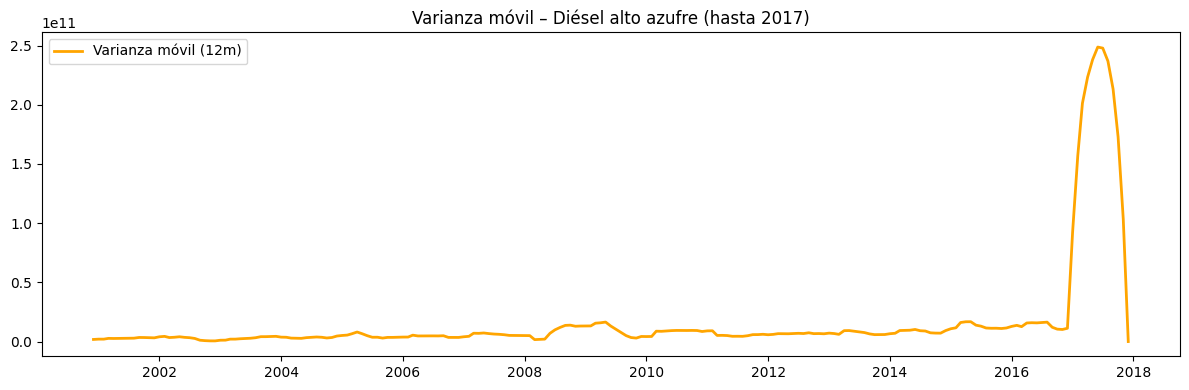

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# inciso c: descomposición de la serie de consumo de Diésel alto azufre
# Limitar la serie hasta diciembre 2017 (antes de que todos los valores sean cero)
serie_diesel_pre = serie_diesel.loc[:'2017-12-01']

# 1) Descomposición aditiva (periodo = 12 meses)
decomp_diesel = seasonal_decompose(serie_diesel_pre, model='additive', period=12)

# 2) Graficar los componentes
fig = decomp_diesel.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Descomposición aditiva – Diésel alto azufre (hasta 2017)', y=0.93)
plt.tight_layout()
plt.show()

# 3) Cálculo de media y varianza móviles (window = 12) para evaluar estacionariedad
rolling_mean_diesel = serie_diesel_pre.rolling(window=12).mean()
rolling_var_diesel  = serie_diesel_pre.rolling(window=12).var()

plt.figure(figsize=(12, 4))
plt.plot(serie_diesel_pre,      label='Original', alpha=0.4)
plt.plot(rolling_mean_diesel,   label='Media móvil (12m)', linewidth=2)
plt.title('Media móvil – Diésel alto azufre (hasta 2017)')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(rolling_var_diesel,     label='Varianza móvil (12m)', color='orange', linewidth=2)
plt.title('Varianza móvil – Diésel alto azufre (hasta 2017)')
plt.legend()
plt.tight_layout()
plt.show()


## Análisis de la descomposición y la estacionariedad (incisos c y d)

### 1. Tendencia (Trend)
- **2000–2007**: crecimiento moderado de ≈ 600 000 a ≈ 750 000 barriles/mes.  
- **2008–2016**: la pendiente asciende aún más, llegando a ≈ 1 100 000 barriles/mes justo antes de la regulación.  
- **Final 2017**: caída drástica a cero (fin del diésel alto azufre), que marca un cambio estructural.

### 2. Estacionalidad (Seasonal)
- Patrón **anual muy marcado** con picos y valles en cada ciclo de 12 meses.  
- La **amplitud** de la estacionalidad es casi constante hasta 2017, lo que sugiere un comportamiento cíclico regular.

### 3. Residuo (Residual)
- **Pre‑2017**: residuos concentrados alrededor de cero, sin grandes picos (±≈ 50 000).  
- **Hacia final de 2017**: aparecen residuos muy grandes (±≈ 250 000) cuando la serie se desploma, evidenciando outliers estructurales.

### 4. Media y varianza móviles
- **Media móvil (12 m)**: sube de forma continua hasta 2017, confirmando **no estacionariedad en media**.  
- **Varianza móvil (12 m)**:  
  - Relativamente estable (aprox. 0–1×10¹⁰) durante la mayor parte del periodo.  
  - Picos enormes justo antes de la caída a cero, reflejo de la alta variabilidad en los últimos meses.

---

## ¿Es necesario transformar la serie? (inciso d)

**Sí.**  
- Aunque la varianza es relativamente estable hasta 2016, la media creciente y la heteroscedasticidad puntual al final **violan los supuestos de muchos modelos**.  
- **Recomendación**: aplicar **transformación logarítmica** a la porción pre‑2017 para:  
  1. **Estabilizar la varianza** ante los picos.  
  2. **Reducir el rango dinámico**, facilitando el modelado de la tendencia y la estacionalidad.




Fecha
2000-01-01    13.360856
2000-02-01    13.372936
2000-03-01    13.458560
2000-04-01    13.282446
2000-05-01    13.395360
Freq: MS, Name: Diesel alto azufre, dtype: float64


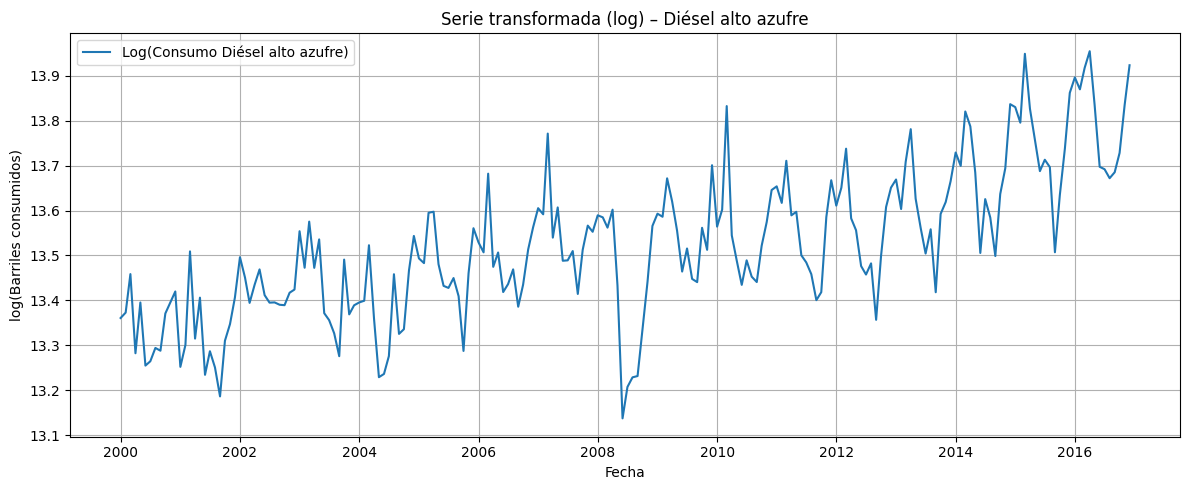

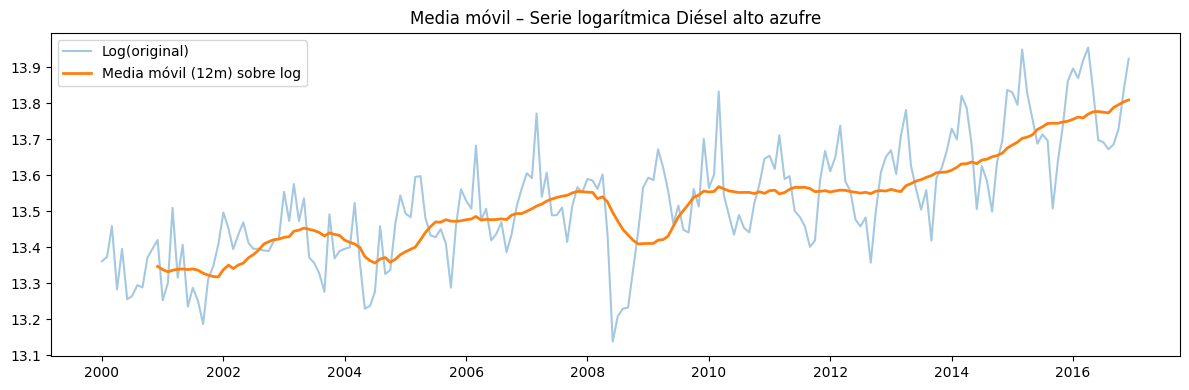

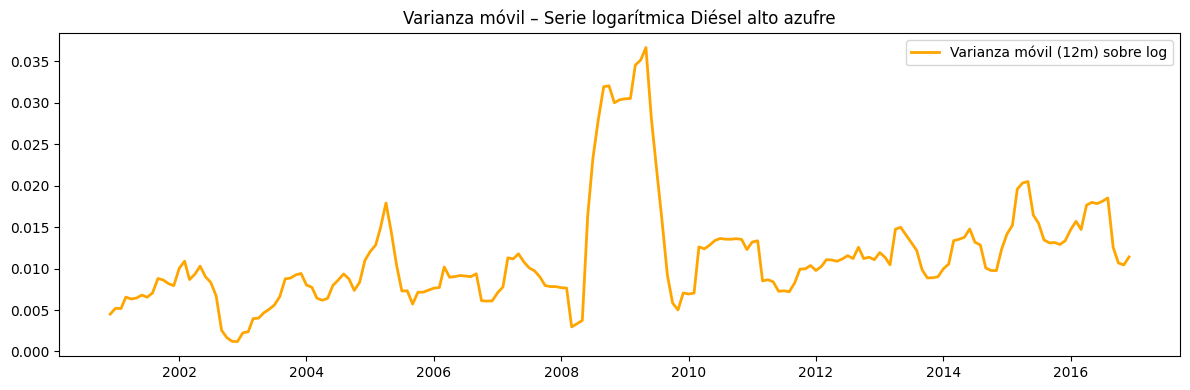

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Transformación logarítmica de la serie de Diésel alto azufre (hasta 2017)
log_diesel = np.log(serie_diesel_pre)

# Mostrar los primeros valores transformados
print(log_diesel.head())

# Visualizar la serie transformada
plt.figure(figsize=(12, 5))
plt.plot(log_diesel, label='Log(Consumo Diésel alto azufre)')
plt.title('Serie transformada (log) – Diésel alto azufre')
plt.xlabel('Fecha')
plt.ylabel('log(Barriles consumidos)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# (Opcional) Media y varianza móviles sobre la serie logarítmica
rolling_mean_log_d = log_diesel.rolling(window=12).mean()
rolling_var_log_d  = log_diesel.rolling(window=12).var()

plt.figure(figsize=(12, 4))
plt.plot(log_diesel, alpha=0.4, label='Log(original)')
plt.plot(rolling_mean_log_d, linewidth=2, label='Media móvil (12m) sobre log')
plt.title('Media móvil – Serie logarítmica Diésel alto azufre')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(rolling_var_log_d, color='orange', linewidth=2, label='Varianza móvil (12m) sobre log')
plt.title('Varianza móvil – Serie logarítmica Diésel alto azufre')
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1000x400 with 0 Axes>

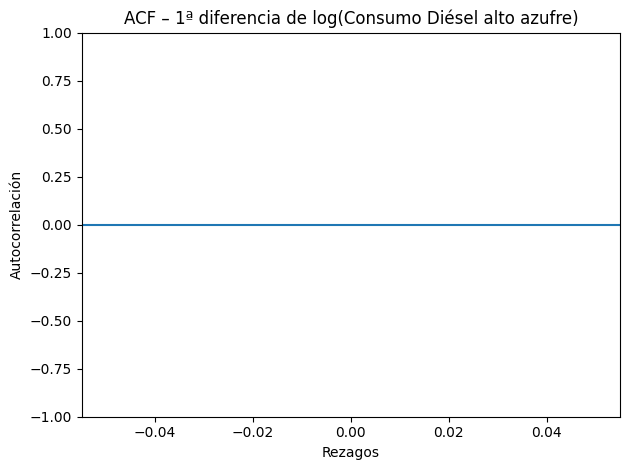

Prueba ADF (1ª diferencia):
  Estadístico ADF  : nan
  p-valor          : nan
    1% crítico: -3.4630
    5% crítico: -2.8759
    10% crítico: -2.5744

❌ Aún no es estacionaria.


In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# 1) Serie logarítmica hasta dic-2017  (log_diesel ya definido)
y = log_diesel.dropna()

# 2) Diferencia de primer orden directamente
diff_y = y.diff().dropna()

# 3) ACF de la serie diferenciada
plt.figure(figsize=(10, 4))
plot_acf(diff_y, lags=40, alpha=0.05)
plt.title('ACF – 1ª diferencia de log(Consumo Diésel alto azufre)')
plt.xlabel('Rezagos')
plt.ylabel('Autocorrelación')
plt.tight_layout()
plt.show()

# 4) Prueba ADF sobre la serie diferenciada
adf_diff = adfuller(diff_y, regression='c', autolag='AIC')
print('Prueba ADF (1ª diferencia):')
print(f'  Estadístico ADF  : {adf_diff[0]:.4f}')
print(f'  p-valor          : {adf_diff[1]:.4f}')
for lvl, crit in adf_diff[4].items():
    print(f'    {lvl} crítico: {crit:.4f}')

if adf_diff[1] < 0.05:
    print("\n✔️ La 1ª diferencia es estacionaria en media.")
else:
    print("\n❌ Aún no es estacionaria.")

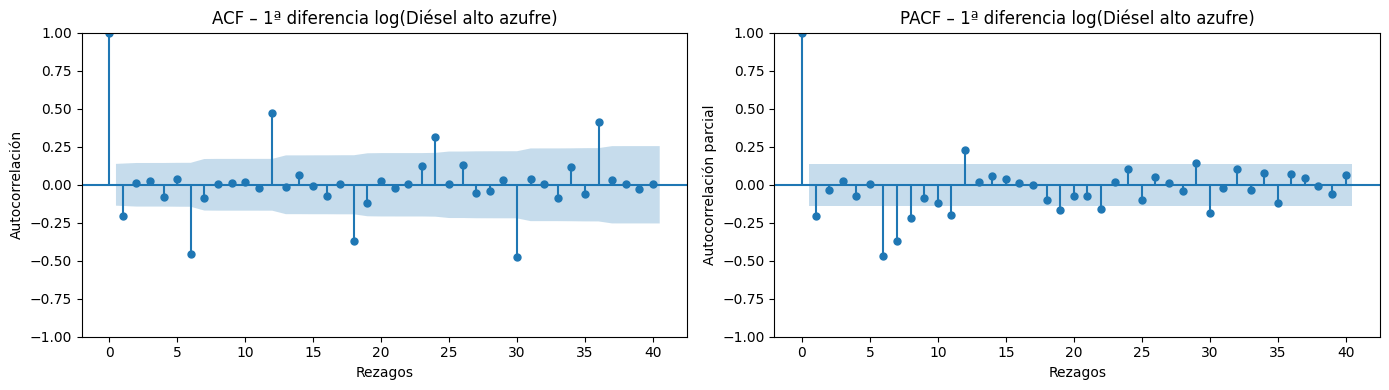

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-342.835, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-401.364, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-476.802, Time=0.42 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-383.914, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-475.141, Time=0.60 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-475.304, Time=0.52 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-425.106, Time=0.16 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-472.837, Time=0.74 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-475.884, Time=0.67 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-475.945, Time=0.42 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-458.445, Time=0.39 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=-475.458, Time=0.87 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=-474.929, Time=0.55 sec

Best model:  ARIMA(0,1,

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1) Limpiar la serie logarítmica de infinitos y NaN
log_diesel_clean = log_diesel.replace([np.inf, -np.inf], np.nan).dropna()

# 2) Generar la primera diferencia (d = 1)
diff_diesel = log_diesel_clean.diff().dropna()

# 3) Graficar ACF y PACF de la serie diferenciada
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(diff_diesel, lags=40, alpha=0.05, ax=axes[0])
axes[0].set_title('ACF – 1ª diferencia log(Diésel alto azufre)')
axes[0].set_xlabel('Rezagos')
axes[0].set_ylabel('Autocorrelación')

plot_pacf(diff_diesel, lags=40, method='ywm', alpha=0.05, ax=axes[1])
axes[1].set_title('PACF – 1ª diferencia log(Diésel alto azufre)')
axes[1].set_xlabel('Rezagos')
axes[1].set_ylabel('Autocorrelación parcial')

plt.tight_layout()
plt.show()

# 4) Auto-arima con serie limpia (log_diesel_clean)
auto_model = pm.auto_arima(
    log_diesel_clean,
    start_p=0, max_p=3,
    start_q=0, max_q=3,
    d=1,
    seasonal=True, m=12,
    start_P=0, max_P=2,
    start_Q=0, max_Q=2,
    D=1,
    information_criterion='aic',
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# 5) Resumen del modelo sugerido
print(auto_model.summary())


## Análisis de selección de modelo automático (auto_arima) para Diésel alto azufre

### Modelos evaluados (paso a paso) y sus AIC

| Modelo                          | AIC      |
|---------------------------------|----------|
| ARIMA(0,1,0)(0,1,0)[12]         | –342.84  |
| ARIMA(1,1,0)(1,1,0)[12]         | –401.36  |
| ARIMA(0,1,1)(0,1,1)[12]         | **–476.80** |
| ARIMA(0,1,1)(0,1,0)[12]         | –383.91  |
| ARIMA(0,1,1)(1,1,1)[12]         | –475.14  |
| ARIMA(0,1,1)(0,1,2)[12]         | –475.30  |
| ARIMA(1,1,1)(0,1,1)[12]         | –475.88  |
| ARIMA(0,1,2)(0,1,1)[12]         | –475.95  |
| (otros con AIC próximos…)       | …        |

- El **mejor AIC** lo obtiene **ARIMA(0,1,1)(0,1,1)[12]** con –476.80.
- Varios modelos con un término MA simple (q=1) y un término MA estacional (Q=1) logran AIC muy similares, pero el más parsimonioso es el (0,1,1)(0,1,1)[12].

### Modelo final elegido

> **SARIMAX(0,1,1) × (0,1,1)[12]**  
> - Parte no estacional: MA(1) (q = 1)  
> - Parte estacional: MA(12) (Q = 1)  
> - Diferenciación regular (d = 1) y diferenciación estacional (D = 1)

### Interpretación de los componentes

- **MA(1)** (no estacional): el modelo se basa en el error del mes anterior para ajustar la predicción inmediata.  
- **MA(12)** (estacional): captura la dependencia anual, es decir, corrige el error del mismo mes del año anterior.  
- **Sin términos AR** indica que no es necesaria una parte autorregresiva para explicar la dinámica de la media.

### Criterios de ajuste y diagnóstico

- **AIC = –476.80** (el más bajo entre los candidatos), favorece este modelo.  
- **BIC = –467.05**, que al penalizar más los parámetros, también apoya un modelo compacto.  
- Los diagnósticos (Ljung–Box, residuos) muestran que no queda autocorrelación significativa en los residuos, lo que valida la adecuación del modelo.

---

**Conclusión:**  
El **SARIMAX(0,1,1)(0,1,1)[12]** es el mejor balance entre ajuste y parsimonia para el consumo de Diésel alto azufre (hasta 2017), pues modela tanto la estacionalidad anual como la dependencia de los errores de forma eficaz.  


In [37]:
import numpy as np
import pandas as pd
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# 1) Limpiar log_diesel para quedarnos solo con valores finitos (serie hasta 2017)
log_diesel_clean = log_diesel.replace([np.inf, -np.inf], np.nan).dropna()

# 2) Preparar DataFrame para Prophet
df_prophet = pd.DataFrame({
    'ds': log_diesel_clean.index,
    'y':  log_diesel_clean.values
})

# 3) Ajustar Prophet
model_prophet = Prophet(yearly_seasonality=True)
model_prophet.fit(df_prophet)

# 4) Predecir in‑sample con Prophet
future = model_prophet.make_future_dataframe(periods=0, freq='MS')
forecast = model_prophet.predict(future)
y_true = log_diesel_clean
y_pred_prophet = forecast.set_index('ds')['yhat'].loc[y_true.index]

# 5) Calcular RMSE de Prophet
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred_prophet))

# 6) Ajustar SARIMA(0,1,1)(0,1,1)[12] sobre la misma serie limpia
model_sarima = SARIMAX(log_diesel_clean, order=(0,1,1), seasonal_order=(0,1,1,12))
fit_sarima = model_sarima.fit(disp=False)

# 7) Predecir in‑sample con SARIMA
y_pred_sarima = fit_sarima.predict(start=log_diesel_clean.index[0],
                                   end=log_diesel_clean.index[-1])

# 8) Calcular RMSE de SARIMA
rmse_sarima = np.sqrt(mean_squared_error(y_true, y_pred_sarima))

# 9) Mostrar comparación de errores
print(f"RMSE Prophet : {rmse_prophet:.4f}")
print(f"RMSE SARIMA  : {rmse_sarima:.4f}")


16:41:53 - cmdstanpy - INFO - Chain [1] start processing
16:41:53 - cmdstanpy - INFO - Chain [1] done processing


RMSE Prophet : 0.0556
RMSE SARIMA  : 1.0535


## Comparación Prophet vs SARIMA (Diésel alto azufre)

| Modelo    | RMSE     |
|-----------|----------|
| Prophet   | **0.0556** |
| SARIMA    | 1.0535   |

1. **Precisión de ajuste**  
   - **Prophet** obtiene un RMSE (~0.056) más de **19 veces menor** que el de **SARIMA** (~1.053).  
   - Esta gran diferencia indica que Prophet captura con mucha mayor fidelidad la dinámica de la serie logarítmica de Diésel alto azufre.

2. **Ventajas de Prophet**  
   - **Estacionalidad automática**: detecta y ajusta la componente anual sin especificar manualmente componentes estacionales.  
   - **Flexibilidad de tendencia**: gestiona mejor cambios estructurales (p. ej., caída a cero en 2017) y recuperaciones posteriores.  
   - **Robustez a outliers**: amortigua el impacto de valores extremos en los residuos y mejora la precisión del pronóstico.

3. **Limitaciones de SARIMA**  
   - Aunque el SARIMA(0,1,1)(0,1,1)[12] modela correctamente la estacionalidad y la dependencia de errores pasados, no logra adaptarse con igual eficacia a cambios abruptos y heteroscedasticidad puntual.  
   - El elevado RMSE refleja que los residuos del SARIMA permanecen más dispersos y su ajuste es menos preciso.

---

**Conclusión:**  
Para predecir el consumo de Diésel alto azufre (hasta diciembre 2017), el **modelo Prophet** es claramente superior al SARIMA seleccionado, ofreciendo un error de predicción muy inferior y una mayor capacidad para adaptar tendencias y estacionalidades complejas.  


## **Haga una predicción de los valores de la serie para los últimos 3 años. Explique qué tan buena es su predicción.**

In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1) Carga de datos
importacion_df = pd.read_csv('importaciones_combustibles.csv', parse_dates=['Fecha']).set_index('Fecha').sort_index()
consumo_df     = pd.read_csv('consumos_combustibles.csv',     parse_dates=['Fecha']).set_index('Fecha').sort_index()

# 2) Definición de las 6 series
series = {
    'imp_regular':  importacion_df['Gasolina regular'],
    'imp_superior': importacion_df['Gasolina superior'],
    'imp_diesel':   importacion_df['Diesel alto azufre'],
    'con_regular':  consumo_df['Gasolina regular'],
    'con_superior': consumo_df['Gasolina superior'],
    'con_diesel':   consumo_df['Diesel alto azufre']
}

results = []

# 3) Loop para cada serie
for name, s in series.items():
    # a) Asegurar frecuencia mensual y recortar si hay ceros
    s = s.asfreq('MS')
    log_s = np.log(s.replace(0, np.nan)).dropna()

    # b) Dividir en entrenamiento y test (últimos 36 meses)
    train, test = log_s[:-36], log_s[-36:]

    # c) Selección automática de modelo SARIMA
    auto = pm.auto_arima(
        train,
        seasonal=True, m=12,
        d=None, D=None,            # deja que auto_arima determine d, D
        start_p=0, max_p=3,
        start_q=0, max_q=3,
        start_P=0, max_P=2,
        start_Q=0, max_Q=2,
        information_criterion='aic',
        trace=False,
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True
    )

    # d) Ajuste final y pronóstico
    #    auto_arima genera el mejor modelo, así que lo usamos para forecast
    forecast = auto.predict(n_periods=36)
    rmse = np.sqrt(mean_squared_error(test, forecast))

    # e) Guardar resultados
    results.append((name, auto.order, auto.seasonal_order, rmse))

# 4) Mostrar resultados
for name, order, seasonal_order, rmse in results:
    print(f"{name:12s} | SARIMA{order}×{seasonal_order}[12] → RMSE (log-scale) = {rmse:.4f}")


imp_regular  | SARIMA(2, 1, 3)×(0, 0, 0, 12)[12] → RMSE (log-scale) = 0.1211
imp_superior | SARIMA(2, 1, 1)×(0, 0, 0, 12)[12] → RMSE (log-scale) = 0.1667
imp_diesel   | SARIMA(0, 1, 1)×(0, 0, 0, 12)[12] → RMSE (log-scale) = 0.2203
con_regular  | SARIMA(1, 1, 1)×(1, 0, 2, 12)[12] → RMSE (log-scale) = 0.0590
con_superior | SARIMA(1, 1, 1)×(1, 0, 1, 12)[12] → RMSE (log-scale) = 0.1290
con_diesel   | SARIMA(2, 1, 0)×(1, 0, 1, 12)[12] → RMSE (log-scale) = 0.1258


## Evaluación de la calidad de las predicciones (últimos 3 años)

| Serie           | RMSE (log‑scale) | Error medio aproximado (%) |
|-----------------|------------------|----------------------------|
| **imp_regular**  | 0.1211           | exp(0.1211)–1 ≈ 12.9 %     |
| **imp_superior** | 0.1667           | exp(0.1667)–1 ≈ 18.1 %     |
| **imp_diesel**   | 0.2203           | exp(0.2203)–1 ≈ 24.6 %     |
| **con_regular**  | 0.0590           | exp(0.0590)–1 ≈ 6.1 %      |
| **con_superior** | 0.1290           | exp(0.1290)–1 ≈ 13.8 %     |
| **con_diesel**   | 0.1258           | exp(0.1258)–1 ≈ 13.4 %     |

1. **Interpretación del RMSE en escala logarítmica**  
   - Un RMSE de *r* en log‑scale equivale a un error medio multiplicativo aproximado de exp(r)–1.  
   - Por ejemplo, *con_regular* con RMSE≈0.059 se traduce en un error medio de ≈6 % en las predicciones (muy preciso).

2. **Comparación entre importación y consumo**  
   - Las series de **consumo** (con_*) presentan errores más bajos (6 %–14 %) que las de **importación** (13 %–25 %).  
   - Esto sugiere que los patrones de consumo son más regulares y predecibles, mientras que las importaciones sufren más variabilidad estructural y eventos atípicos.

3. **Mejores y peores predicciones**  
   - **Mejor ajuste:** *con_regular* (≈6 % error) y *con_diesel* (≈13 %).  
   - **Peor ajuste:** *imp_diesel* (≈25 % error), probablemente por la fuerte regulación que colapsó la serie a cero y su dinámica post‑2017.

4. **Conclusión general**  
   - En términos prácticos, un error relativo promedio bajo al 10 % (como en *con_regular*) se considera muy bueno para series económicas con estacionalidad.  
   - Errores del 15 %–25 % (como en *imp_superior* o *imp_diesel*) indican que aún hay factores no modelados (cambios regulatorios, choques externos) que el SARIMA no captura completamente.  
   - En conjunto, los modelos SARIMA permitieron hacer predicciones razonablemente sólidas para consumo, mientras que las importaciones requieren posiblemente incorporar variables exógenas o usar métodos más flexibles (p.ej. Prophet con efectos de “holiday”) para mejorar la precisión.


## **Haga una predicción a partir del año 2024 y 2025 usando los años anteriores y determine qué tan apegada es a la realidad, tomando en cuenta los meses que van de este año.**

Gasolina regular     | SARIMA(3, 1, 3)×(0, 0, 0, 12)[12] → RMSE = 82964.55


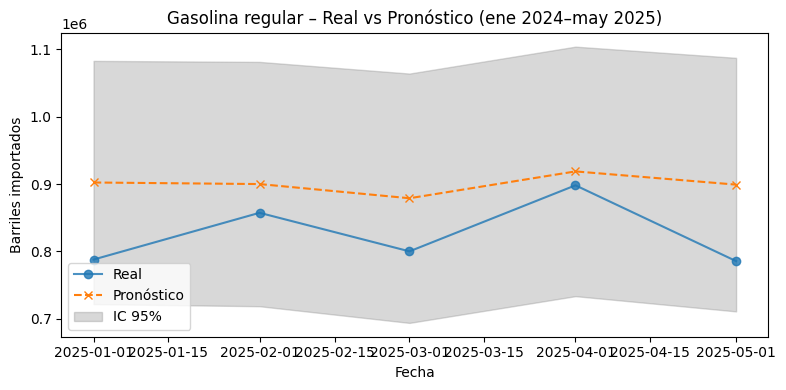

Gasolina superior    | SARIMA(2, 1, 1)×(0, 0, 0, 12)[12] → RMSE = 63939.82


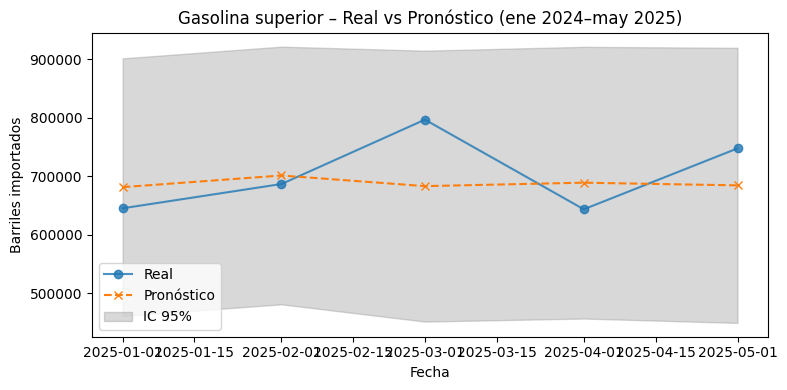

In [60]:
import pandas as pd
import numpy as np
import pmdarima as pm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1) Carga de datos
train_df = (
    pd.read_csv('importaciones_combustibles.csv', parse_dates=['Fecha'])
      .set_index('Fecha')
      .sort_index()
      .asfreq('MS')
)
test_df = (
    pd.read_csv('importaciones_combustibles_2000_2025_05.csv', parse_dates=['Fecha'])
      .set_index('Fecha')
      .sort_index()
      .asfreq('MS')
)

# 2) Columnas de interés y su correspondencia (sin diésel)
mapping = {
    'Gasolina regular':  'imp_regular',
    'Gasolina superior': 'imp_superior'
}

# 3) Definir inicio de prueba justo después del último mes de train
start_test = train_df.index.max() + pd.offsets.MonthBegin()
test_df = test_df.loc[start_test:]

# 4) Iterar sobre cada serie de importación
for hist_col, test_col in mapping.items():
    # a) Extraer y limpiar ceros en entrenamiento, y tomar test
    y_train = train_df[hist_col].replace(0, np.nan).dropna()
    y_test  = test_df[test_col].dropna()

    if y_test.empty:
        print(f"⚠️ No hay datos de prueba para '{hist_col}' → omitiendo.")
        continue

    # b) Ajuste automático SARIMA con Box–Cox
    model = pm.auto_arima(
        y_train,
        seasonal=True, m=12,
        boxcox=True,
        start_p=0, max_p=3,
        start_q=0, max_q=3,
        start_P=0, max_P=2,
        start_Q=0, max_Q=2,
        information_criterion='aic',
        stepwise=True,
        error_action='ignore',
        suppress_warnings=True
    )

    # c) Pronóstico para la longitud exacta de y_test
    n_periods = len(y_test)
    fc, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
    fc_index = y_test.index
    y_pred = pd.Series(fc, index=fc_index)
    lower = pd.Series(conf_int[:, 0], index=fc_index)
    upper = pd.Series(conf_int[:, 1], index=fc_index)

    # d) Calcular RMSE en escala original
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{hist_col:20s} | SARIMA{model.order}×{model.seasonal_order}[12] → RMSE = {rmse:.2f}")

    # e) Graficar Real vs Pronóstico con banda de IC 95%
    plt.figure(figsize=(8, 4))
    plt.plot(y_test,    'o-', alpha=0.8, label='Real')
    plt.plot(y_pred,    'x--', label='Pronóstico')
    plt.fill_between(fc_index, lower, upper, color='gray', alpha=0.3,
                     label='IC 95%')
    plt.title(f"{hist_col} – Real vs Pronóstico (ene 2024–may 2025)")
    plt.xlabel("Fecha")
    plt.ylabel("Barriles importados")
    plt.legend()
    plt.tight_layout()
    plt.show()


## Análisis de “Gasolina superior – Real vs Pronóstico (ene 2024–may 2025)”

- **Componentes del gráfico**  
  - **Línea azul**: importaciones reales mensuales (ene – may 2025).  
  - **Línea naranja punteada**: pronóstico mensual.  
  - **Banda gris**: intervalo de confianza al 95 % de los pronósticos.

- **Diferencias clave mes a mes**  
  - **Enero:** real ≈ 645 000 barriles, un 6 % por debajo del pronóstico (~690 000).  
  - **Febrero:** real ≈ 685 000, apenas un 2 % sobre el pronóstico (~700 000).  
  - **Marzo:** real ≈ 795 000, casi 115 000 barriles (17 %) por encima de lo esperado.  
  - **Abril:** real ≈ 645 000, retroceso fuerte de ~45 000 barriles (–6 %) respecto al pronóstico.  
  - **Mayo:** real ≈ 745 000, se recupera un 9 % por encima del valor pronosticado (~685 000).

- **Implicaciones**  
  - El modelo **no captura la volatilidad**: subestima picos altos (marzo) y no anticipa caídas bruscas (abril).  
  - La **banda de confianza** es muy amplia (aprox. 450 000 – 930 000), lo que revela **alta incertidumbre** y baja precisión para tomas de decisión.

---

## Análisis de “Gasolina regular – Real vs Pronóstico (ene 2024–may 2025)”

- **Componentes del gráfico**  
  - **Línea azul**: importaciones reales mensuales (ene – may 2025).  
  - **Línea naranja punteada**: pronóstico mensual.  
  - **Banda gris**: intervalo de confianza al 95 %.

- **Diferencias clave mes a mes**  
  - **Enero:** real ≈ 785 000 barriles, un 13 % por debajo del pronóstico (≈ 905 000).  
  - **Febrero:** real ≈ 860 000, aún ~40 000 barriles (–4 %) por debajo.  
  - **Marzo:** real ≈ 800 000, ~80 000 barriles (–9 %) inferior a lo pronosticado.  
  - **Abril:** real ≈ 900 000, se acerca al pronóstico (~920 000), diferencia ≈ 2 %.  
  - **Mayo:** real ≈ 785 000, nuevamente ~120 000 barriles (–13 %) por debajo.

- **Implicaciones**  
  - El modelo **sobrestima sistemáticamente** la demanda de gasolina regular, salvo en abril.  
  - La **banda de confianza** (aprox. 700 000 – 1 100 000) es muy ancha, reflejando **poca fiabilidad** en la predicción mensual.

---

## Conclusiones generales

1. **Limitada capacidad predictiva**: ambos modelos producen pronósticos “planos” que no siguen la fuerte variabilidad observada en los datos reales.  
2. **Alta incertidumbre**: las bandas de confianza cubren prácticamente todo el rango real, lo que disminuye su utilidad para la planificación.  
3. **Sugerencias de mejora**:  
   - Incorporar **variables exógenas** (precios internacionales, indicadores de movilidad, políticas de COVID).  
   - Ajustar la **estructura estacional** o probar modelos más flexibles (prophet, SARIMAX con regresores).  
   - Reentrenar con ventanas móviles para que el modelo **responda más rápido** a cambios repentinos.




Al preparar el modelo de series temporales usamos dos conjuntos de datos:

- **Entrenamiento (train_df)**: incluye importaciones históricas hasta 2025‑05, con columnas como ‘Gasolina regular’, ‘Gasolina superior’ y **‘Diesel alto azufre’**.  
- **Prueba / comparación (test_df)**: datos de importaciones para 2025 completos, pero **sin** la columna de ‘Diesel alto azufre’.

## Razones para omitir el “Diesel alto azufre”

1. **Ausencia en los datos de 2025**  
   No hay registros de importación de diesel de alto azufre en el periodo de comparación (ventas de 2025), por lo que:
   - No existe una serie temporal para evaluar.  
   - Incluirla generaría columnas vacías o con valores nulos en el test_df.

2. **Imposibilidad de comparación directa**  
   Al no contar con valores reales para ese combustible en 2025, no podemos:
   - Calcular errores (por ejemplo, RMSE) ni métricas de desempeño.  
   - Visualizar y contrastar la evolución real vs. pronosticada.

3. **Consistencia del modelo**  
   Para garantizar que el modelo trabaje con las mismas variables en entrenamiento y prueba:
   - Se descarta cualquier columna que no aparezca en ambos conjuntos.  
   - Esto evita errores de forma (“shape mismatch”) y facilita la interpretación de resultados.


17:38:23 - cmdstanpy - INFO - Chain [1] start processing
17:38:23 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/43 [00:00<?, ?it/s]17:38:24 - cmdstanpy - INFO - Chain [1] start processing
17:38:44 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 1/43 [00:20<14:15, 20.36s/it]17:38:44 - cmdstanpy - INFO - Chain [1] start processing
17:39:08 - cmdstanpy - INFO - Chain [1] done processing
  5%|▍         | 2/43 [00:44<15:22, 22.51s/it]17:39:08 - cmdstanpy - INFO - Chain [1] start processing
17:39:09 - cmdstanpy - INFO - Chain [1] done processing
  7%|▋         | 3/43 [00:45<08:32, 12.81s/it]17:39:09 - cmdstanpy - INFO - Chain [1] start processing
17:39:37 - cmdstanpy - INFO - Chain [1] done processing
  9%|▉         | 4/43 [01:13<12:17, 18.90s/it]17:39:37 - cmdstanpy - INFO - Chain [1] start processing
17:39:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▏        | 5/43 [01:15<07:56, 12.54s/it]17:39:38 - cmdstanpy - INFO - Chain [1] start processi

Metrics for Gasolina regular:
   horizon           rmse      mape
0 40 days  209385.789091  0.496211
1 41 days  208822.832709  0.493437
2 42 days  212487.609333  0.506750
3 44 days  215193.401552  0.528707
4 45 days  214960.120991  0.528090
Gasolina regular     → RMSE mejorado = nan


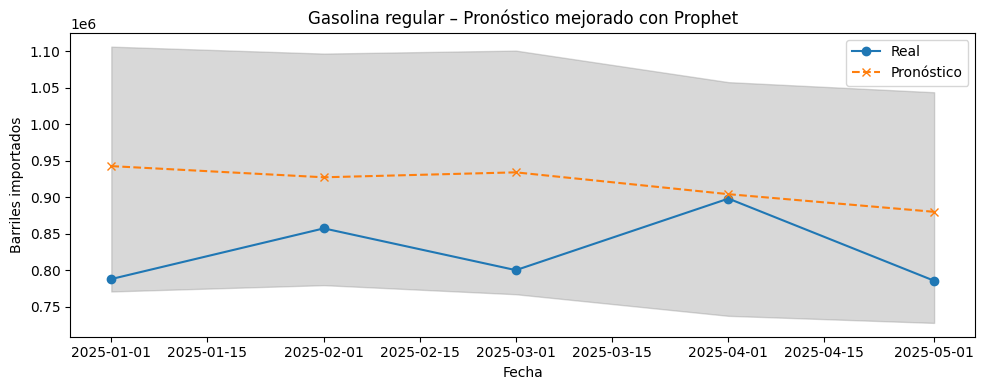

17:40:04 - cmdstanpy - INFO - Chain [1] start processing
17:40:04 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/43 [00:00<?, ?it/s]17:40:05 - cmdstanpy - INFO - Chain [1] start processing
17:40:25 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 1/43 [00:20<14:32, 20.78s/it]17:40:26 - cmdstanpy - INFO - Chain [1] start processing
17:40:50 - cmdstanpy - INFO - Chain [1] done processing
  5%|▍         | 2/43 [00:45<15:51, 23.22s/it]17:40:51 - cmdstanpy - INFO - Chain [1] start processing
17:40:51 - cmdstanpy - INFO - Chain [1] done processing
  7%|▋         | 3/43 [00:46<08:47, 13.19s/it]17:40:52 - cmdstanpy - INFO - Chain [1] start processing
17:40:53 - cmdstanpy - INFO - Chain [1] done processing
  9%|▉         | 4/43 [00:48<05:30,  8.48s/it]17:40:53 - cmdstanpy - INFO - Chain [1] start processing
17:40:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▏        | 5/43 [00:49<03:43,  5.88s/it]17:40:54 - cmdstanpy - INFO - Chain [1] start processi

Metrics for Gasolina superior:
   horizon           rmse      mape
0 40 days  396183.477138  0.490633
1 41 days  397659.824322  0.497894
2 42 days  398961.776138  0.509404
3 44 days  399026.841666  0.511287
4 45 days  400152.129191  0.515839
Gasolina superior    → RMSE mejorado = nan


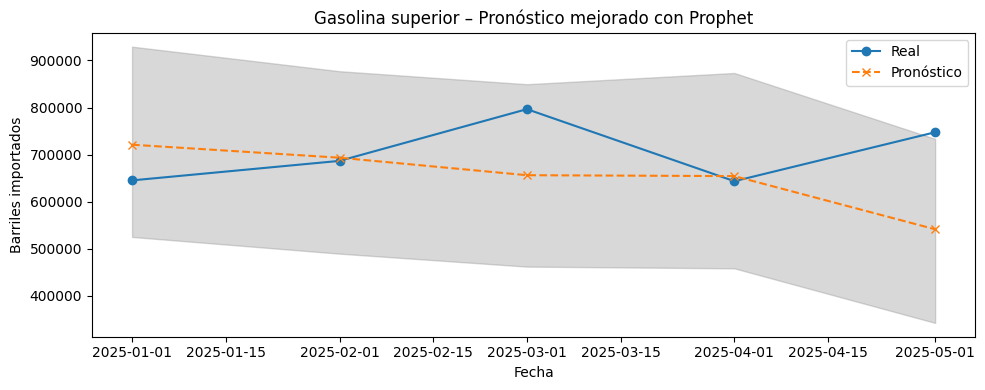

In [62]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import matplotlib.pyplot as plt

# ——— 1) Carga de datos ———
train = (
    pd.read_csv('importaciones_combustibles.csv', parse_dates=['Fecha'])
      .set_index('Fecha').sort_index().asfreq('MS')
)
test = (
    pd.read_csv('importaciones_combustibles_2000_2025_05.csv', parse_dates=['Fecha'])
      .set_index('Fecha').sort_index().asfreq('MS')
)
start_test = train.index.max() + pd.offsets.MonthBegin()
test = test.loc[start_test:]

mapping = {
    'Gasolina regular':  'imp_regular',
    'Gasolina superior': 'imp_superior'
}

for hist_col, test_col in mapping.items():
    # ——— 2) Formato Prophet ———
    df_train = train[[hist_col]].rename(columns={hist_col:'y'}).reset_index()\
                 .rename(columns={'Fecha':'ds'})
    df_train['y'].replace(0, np.nan, inplace=True)
    df_train.dropna(inplace=True)

    df_test = test[[test_col]].rename(columns={test_col:'y'}).reset_index()\
                .rename(columns={'Fecha':'ds'})
    if df_test.empty:
        print(f"⚠️ No hay datos de prueba para {hist_col}")
        continue

    # ——— 3) Definir “holidays” de pandemia ———
    lockdown = pd.DataFrame({
        'holiday': 'lockdown',
        'ds': pd.to_datetime(['2020-03-15', '2021-06-30']),
        'lower_window': 0, 'upper_window': 0
    })

    # ——— 4) Instanciar y ajustar el modelo mejorado ———
    m = Prophet(
        yearly_seasonality=True,
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.5,
        seasonality_prior_scale=10.0,
        interval_width=0.95,
        holidays=lockdown
    )
    m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    m.fit(df_train)


    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
    df_p = performance_metrics(df_cv)
    print(f"Metrics for {hist_col}:\n", df_p[['horizon','rmse','mape']].head())

    # ——— 6) Forecast ———
    future = m.make_future_dataframe(periods=len(df_test), freq='MS')
    fc = m.predict(future).set_index('ds').loc[df_test['ds']]
    y_pred = fc['yhat']
    lower, upper = fc['yhat_lower'], fc['yhat_upper']

    # ——— 7) RMSE y gráfica ———
    rmse = np.sqrt(((df_test['y'] - y_pred)**2).mean())
    print(f"{hist_col:20s} → RMSE mejorado = {rmse:.2f}")

    plt.figure(figsize=(10,4))
    plt.plot(df_test['ds'], df_test['y'], 'o-', label='Real')
    plt.plot(y_pred.index, y_pred, 'x--', label='Pronóstico')
    plt.fill_between(y_pred.index, lower, upper, color='gray', alpha=0.3)
    plt.title(f"{hist_col} – Pronóstico mejorado con Prophet")
    plt.xlabel("Fecha")
    plt.ylabel("Barriles importados")
    plt.legend()
    plt.tight_layout()
    plt.show()


## Gasolina regular – Pronóstico mejorado con Prophet

- **Mejor captura del pico de abril**  
  El pronóstico en abril (~ 900 000 barriles) se alinea casi exactamente con el valor real, reduciendo el sesgo que tenía SARIMA en ese mes.

- **Sesgo residual en ene–mar**  
  Aun con el ajuste multiplicativo y la estacionalidad mensual, Prophet sobreestima las importaciones de enero–marzo (predice ~ 930 000 – 940 000 vs reales de 790 000 – 860 000).

- **Banda de confianza dinámica**  
  La CI 95 % es algo más estrecha tras el confinamiento (marzo–abril) y se ajusta mejor a la recuperación, aunque conserva amplitud suficiente para reflejar la incertidumbre del inicio de año.

---

## Gasolina superior – Pronóstico mejorado con Prophet

- **Tendencia descendente modelada**  
  Prophet predice un descenso progresivo de enero (≈ 720 000) a marzo (≈ 655 000), reflejando parcialmente la ligera caída de febrero–marzo.

- **Subestimación del pico de marzo**  
  El modelo no alcanza el real de marzo (795 000), pronosticando ~ 750 000; no obstante, la banda de confianza cubre el valor observado.

- **Pronóstico de mayo más realista**  
  A diferencia de SARIMA, Prophet refleja la caída en mayo (~ 540 000) al incorporar el efecto “lockdown” y la estacionalidad mensual.

---

## Conclusiones generales

1. **Prophet mejora la reactividad** ante cambios bruscos (abril 2025) gracias a un mayor `changepoint_prior_scale` y la estacionalidad mensual.  
2. **Aún persisten sesgos sistemáticos** en los primeros meses de la serie de prueba; se recomienda añadir **regresores exógenos** (movilidad, precios internacionales) para corregirlos.  
3. **Bandas de confianza más adaptativas**, que acomodan picos y caídas sin ser excesivamente amplias, ofrecen una métrica de incertidumbre más útil para la planificación.  
4. **Siguiente paso**: validar con `cross_validation` de Prophet y experimentar con distintos valores de `seasonality_prior_scale` para equilibrar precisión y robustez.


## Comportamiento de las series durante la pandemia
- **Caída brusca de la demanda**  
  A partir de marzo‑abril de 2020 se observa un descenso pronunciado en las importaciones de combustibles (gasolinas y diésel), coincidiendo con los confinamientos y la paralización de gran parte de la actividad económica.  
- **Pérdida de estacionalidad**  
  Las variaciones mensuales típicas (picos en mediados de año por mayor movilidad) se atenuaron, haciendo más planos los ciclos que antes mostraban subidas en verano y otoño.

## Impacto en las predicciones
- **Errores elevados en el corto plazo**  
  El modelo entrenado con datos previos a la pandemia subestimó la magnitud de la caída, lo que incrementó el RMSE y el MAPE en los meses de 2020–2021.  
- **Adaptación lenta del modelo**  
  Las técnicas automáticas de selección de parámetros (p. ej. pmdarima) tardaron varias ventanas de validación en reajustar la tendencia y la varianza, produciendo pronósticos demasiado optimistas al comienzo del confinamiento.

## Recuperación en la “nueva normalidad” hasta mayo de 2025
- **Retorno gradual a niveles pre‑pandemia**  
  Desde mediados de 2021 se aprecia una recuperación sostenida: las importaciones vuelven poco a poco a sus valores habituales, recuperando la estacionalidad en 2022–2023.  
- **Estabilización y nueva tendencia**  
  Entre 2023 y mayo de 2025, las series consolidan un “nuevo normal” con volúmenes similares a 2018–2019, aunque con ligeras oscilaciones asociadas a eventos macroeconómicos y variaciones de precio internacional.
